# This Notebook shows how the disaggregation of energy consumption on the level of applications works for the sectors CTS and industry 

## 1. Imports

In [3]:
# at first, the user has to import the respective packages and modules from the disaggregator
import pandas as pd
import numpy as np
from disaggregator import config, data, spatial, temporal, plot, heat
import matplotlib.pyplot as plt
# plt.style.use(['science','no-latex'])

### Inputs

In [3]:
source='power'
sector='CTS'
year=2015

## 2. Disaggregation by application

In [13]:
df_app_cts = heat.disagg_applications(source, sector, use_nuts3code=True, year=2015)
df_app_cts.head()

WZ              1                                          \
AWB    Beleuchtung          IKT   Klimakälte Prozesskälte   
DEF01    71.273217    12.958767    25.917533     6.479383   
DEF02   317.988198    57.816036   115.632072    28.908018   
DEF03   493.429963    89.714539   179.429077    44.857269   
DEF04   937.516930   170.457624   340.915247    85.228812   
DEF05  8059.356064  1465.337466  2930.674932   732.668733   

WZ                                                                  \
AWB   Mechanische \nEnergie Prozesswärme    Raumwärme   Warmwasser   
DEF01            116.628900          0.0    12.958767    32.396917   
DEF02            520.344325          0.0    57.816036   144.540090   
DEF03            807.430849          0.0    89.714539   224.286347   
DEF04           1534.118613          0.0   170.457624   426.144059   
DEF05          13188.037196          0.0  1465.337466  3663.343666   

WZ             2             ...        98                     99              \
AWB   Beleuchtung       IKT  ... Raumwärme Warmwasser Beleuchtung         IKT   
DEF01    0.000000  0.000000  ...  0.000000   0.000000  358.141933  166.721245   
DEF02   12.745374  2.317341  ...  2.756190   2.803711    0.000000    0.000000   
DEF03   13.924187  2.531670  ...  2.925743   2.976186    0.000000    0.000000   
DEF04    0.000000  0.000000  ...  0.000000   0.000000    0.000000    0.000000   
DEF05    4.782827  0.869605  ...  0.000000   0.000000    0.000000    0.000000   

WZ                                                                           \
AWB   Klimakälte Prozesskälte Mechanische \nEnergie Prozesswärme  Raumwärme   
DEF01  21.268965    89.878531            261.402445    50.771079  39.793548   
DEF02   0.000000     0.000000              0.000000     0.000000   0.000000   
DEF03   0.000000     0.000000              0.000000     0.000000   0.000000   
DEF04   0.000000     0.000000              0.000000     0.000000   0.000000   
DEF05   0.000000     0.000000              0.000000     0.000000   0.000000   

WZ                
AWB   Warmwasser  
DEF01  40.479644  
DEF02   0.000000  
DEF03   0.000000  
DEF04   0.000000  
DEF05   0.000000  

[5 rows x 464 columns]

In [12]:
df_app_ind = heat.disagg_applications(source='gas', sector='industry', disagg_ph=True, use_nuts3code=True, year=2015)
df_app_ind.head()

WZ                       5                                            \
AWB   Mechanische \nEnergie Raumwärme Warmwasser Prozesswärme <100°C   
DEF01                   0.0       0.0        0.0                 0.0   
DEF02                   0.0       0.0        0.0                 0.0   
DEF03                   0.0       0.0        0.0                 0.0   
DEF04                   0.0       0.0        0.0                 0.0   
DEF05                   0.0       0.0        0.0                 0.0   

WZ                                                                           \
AWB   Prozesswärme 100°C-200°C Prozesswärme 200°C-500°C Prozesswärme >500°C   
DEF01                      0.0                      0.0                 0.0   
DEF02                      0.0                      0.0                 0.0   
DEF03                      0.0                      0.0                 0.0   
DEF04                      0.0                      0.0                 0.0   
DEF05                      0.0                      0.0                 0.0   

WZ                       6                            ...  \
AWB   Mechanische \nEnergie     Raumwärme Warmwasser  ...   
DEF01              0.000000      0.000000        0.0  ...   
DEF02              0.000000      0.000000        0.0  ...   
DEF03              0.000000      0.000000        0.0  ...   
DEF04              0.000000      0.000000        0.0  ...   
DEF05           6542.845206  19628.535617        0.0  ...   

WZ                          32                                               \
AWB   Prozesswärme 100°C-200°C Prozesswärme 200°C-500°C Prozesswärme >500°C   
DEF01               197.829614                68.126754                 0.0   
DEF02               446.384770               153.721908                 0.0   
DEF03              5018.024245              1728.061330                 0.0   
DEF04               568.126071               195.646064                 0.0   
DEF05               143.299656                49.348226                 0.0   

WZ                       33                                             \
AWB   Mechanische \nEnergie   Raumwärme Warmwasser Prozesswärme <100°C   
DEF01             13.657214  112.672012  10.242910           23.911429   
DEF02             77.548171  639.772413  58.161128          135.773495   
DEF03             71.291228  588.152634  53.468421          124.818665   
DEF04             30.526297  251.841952  22.894723           53.446290   
DEF05            113.952203  940.105672  85.464152          199.510686   

WZ                                                                           
AWB   Prozesswärme 100°C-200°C Prozesswärme 200°C-500°C Prozesswärme >500°C  
DEF01               153.643652                52.910397                 0.0  
DEF02               872.416926               300.434968                 0.0  
DEF03               802.026319               276.194494                 0.0  
DEF04               343.420844               118.264132                 0.0  
DEF05              1281.962281               441.470454                 0.0  

[5 rows x 203 columns]

## 3. Modellierung zukünftiger Jahre

### 3.1 Activity effect

An activity effect is modelled describing an increase of energy consumption due to increasing economic output. The projection starts in 2020 based on individual fixed growth rates of gross value added for industrial industry branches and energy reference area, driven by employment rates, in the CTS sector.

In [14]:
year=2040

In [16]:
df_future_ind_2040 = spatial.disagg_CTS_industry(source, sector, year=year) 

2022-03-21 13:33:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-21 13:33:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-21 13:33:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-21 13:33:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-21 13:33:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-21 13:33:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-21 13:33:33 disaggregator.config: INFO

2022-03-21 13:33:44 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-21 13:33:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-21 13:33:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-21 13:33:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-21 13:33:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-21 13:33:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-21 13:33:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-03-21 13:34:14 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [5]:
df_el_cts=pd.DataFrame()
for year in range(2001,2051):
    a = spatial.disagg_CTS_industry(source='power', sector='CTS', year=year)
    df_el_cts[year]=a[0].sum(axis=1)

2022-04-22 12:59:25 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 12:59:25 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:25 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:25 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 12:59:25 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:25 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:25 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 12:59:25 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:25 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 12:59:27 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


Regional energy consumption of 2003 was used for calibration 
of industrial energy consumption.


2022-04-22 12:59:33 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 12:59:35 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 12:59:35 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:35 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:35 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 12:59:35 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:35 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:35 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 12:59:35 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:35 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 12:59:37 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


Regional energy consumption of 2003 was used for calibration 
of industrial energy consumption.


2022-04-22 12:59:42 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 12:59:44 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 12:59:44 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:44 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:44 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 12:59:44 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:44 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:45 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 12:59:45 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:45 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 12:59:46 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 12:59:51 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 12:59:54 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 12:59:54 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:54 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:54 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 12:59:54 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:54 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:54 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 12:59:54 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:54 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 12:59:55 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:00:03 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:00:05 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:00:05 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:05 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:05 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:00:05 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:05 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:06 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:00:06 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:06 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:00:07 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:00:14 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:00:16 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:00:16 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:16 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:16 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:00:16 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:16 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:16 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:00:16 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:16 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:00:17 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:00:23 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:00:25 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:00:25 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:25 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:25 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:00:25 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:25 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:25 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:00:25 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:25 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:00:26 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:00:32 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:00:35 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:00:35 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:35 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:35 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:00:35 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:35 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:35 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:00:35 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:35 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:08:13 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:08:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:08:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 13:08:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 13:08:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 13:08:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.0
2022-04-22 13:08:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2026&&value=gt.0.

2022-04-22 13:08:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:08:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:08:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:08:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 13:08:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 13:08:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 13:08:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-04-22 13:08:45 disaggregator.config: INFO

2022-04-22 13:08:53 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:08:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:08:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:08:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 13:08:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 13:08:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 13:09:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.

2022-04-22 13:09:16 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:09:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:09:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:09:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:09:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 13:09:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 13:09:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 13:09:21 disaggregator.config: INFO

2022-04-22 13:09:30 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:09:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:09:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:09:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:09:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 13:09:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 13:09:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.

2022-04-22 13:09:55 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:09:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:09:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:09:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:09:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:09:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 13:10:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 13:10:01 disaggregator.config: INFO

2022-04-22 13:10:11 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:10:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:10:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:10:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:10:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:10:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 13:10:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.

2022-04-22 13:10:38 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:10:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:10:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:10:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:10:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:10:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:10:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 13:10:44 disaggregator.config: INFO

2022-04-22 13:10:55 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:10:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:10:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:10:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:11:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:11:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:11:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-04-22 13:11:23 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:11:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:11:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:11:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:11:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:11:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:11:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:11:28 disaggregator.config: INFO

2022-04-22 13:11:41 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:11:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:11:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:11:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:11:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:11:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:11:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.

2022-04-22 13:12:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:12:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:12:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:12:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:12:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:12:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:12:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:12:15 disaggregator.config: INFO

2022-04-22 13:12:28 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:12:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:12:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:12:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:12:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:12:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:12:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.

2022-04-22 13:12:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:12:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:13:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:13:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:13:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:13:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:13:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:13:04 disaggregator.config: INFO

2022-04-22 13:13:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:13:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:13:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:13:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:13:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:13:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:13:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.

2022-04-22 13:13:48 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:13:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:13:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:13:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:13:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:13:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:13:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:13:53 disaggregator.config: INFO

2022-04-22 13:14:08 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:14:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:14:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:14:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:14:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:14:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:14:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.

2022-04-22 13:14:40 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:14:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:14:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:14:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:14:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:14:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:14:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:14:45 disaggregator.config: INFO

2022-04-22 13:15:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:15:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:15:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:15:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:15:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:15:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:15:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-04-22 13:15:36 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:15:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:15:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:15:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:15:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:15:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:15:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:15:41 disaggregator.config: INFO

2022-04-22 13:15:57 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:15:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:15:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:16:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:16:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:16:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:16:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.

2022-04-22 13:16:33 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:16:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:16:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:16:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:16:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:16:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:16:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:16:39 disaggregator.config: INFO

2022-04-22 13:16:55 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:16:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:16:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:16:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:17:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:17:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:17:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.

2022-04-22 13:17:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:17:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:17:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:17:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:17:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:17:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:17:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:17:37 disaggregator.config: INFO

2022-04-22 13:17:56 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:17:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:17:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:18:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:18:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:18:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:18:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.

2022-04-22 13:18:35 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:18:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:18:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:18:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:18:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:18:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:18:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:18:40 disaggregator.config: INFO

2022-04-22 13:19:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:19:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:19:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:19:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:19:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:19:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:19:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.

2022-04-22 13:19:43 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:19:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:19:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:19:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:19:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:19:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:19:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:19:48 disaggregator.config: INFO

2022-04-22 13:20:10 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:20:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:20:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:20:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:20:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:20:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:20:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.

2022-04-22 13:20:50 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:20:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:20:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:20:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:20:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:20:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:20:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:20:57 disaggregator.config: INFO

2022-04-22 13:21:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:21:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:21:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:21:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:21:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:21:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:21:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.

2022-04-22 13:21:57 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:21:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 13:21:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:21:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:22:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:22:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:22:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:22:02 disaggregator.config: INFO

2022-04-22 13:22:22 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:22:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 13:22:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:22:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:22:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:22:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:22:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.

2022-04-22 13:23:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:23:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 13:23:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 13:23:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:23:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:23:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:23:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:23:09 disaggregator.config: INFO

2022-04-22 13:23:30 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:23:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 13:23:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 13:23:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:23:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:23:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:23:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.

2022-04-22 13:24:13 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:24:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 13:24:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 13:24:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 13:24:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:24:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:24:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:24:18 disaggregator.config: INFO

2022-04-22 13:24:42 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:24:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 13:24:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 13:24:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 13:24:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:24:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:24:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.

2022-04-22 13:25:33 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:25:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2050&&value=gt.0.0
2022-04-22 13:25:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 13:25:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 13:25:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 13:25:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:25:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:25:38 disaggregator.config: INFO

2022-04-22 13:26:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:26:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2050&&value=gt.0.0
2022-04-22 13:26:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 13:26:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 13:26:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 13:26:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:26:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.

2022-04-22 13:26:48 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [15]:
df_el_cts.to_csv('./data_out/Diss/CTS_EL_by_year_and_WZ.csv')

<AxesSubplot:>

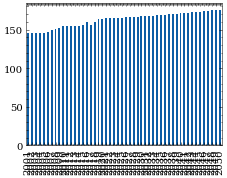

In [8]:
(df_el_cts.T.sum(axis=1)/1000000).plot(kind='bar')

In [9]:
df_el_industry=pd.DataFrame()
for year in range(2001,2051):
    a = spatial.disagg_CTS_industry(source='power', sector='industry', year=year)
    df_el_industry[year]=a[0].sum(axis=1)

2022-04-22 13:30:53 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 13:30:53 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:30:53 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:30:53 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 13:30:53 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:30:53 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:30:53 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 13:30:53 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:30:53 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:30:55 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


Regional energy consumption of 2003 was used for calibration 
of industrial energy consumption.


2022-04-22 13:31:01 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:31:03 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 13:31:03 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:03 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:03 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 13:31:03 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:03 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:04 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 13:31:04 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:04 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:31:05 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


Regional energy consumption of 2003 was used for calibration 
of industrial energy consumption.


2022-04-22 13:31:11 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:31:13 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 13:31:13 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:13 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:13 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 13:31:13 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:13 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:13 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 13:31:13 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:13 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:31:15 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:31:20 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:31:22 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 13:31:22 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:22 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:23 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 13:31:23 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:23 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:23 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 13:31:23 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:23 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:31:24 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:31:29 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:31:31 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:31:31 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:31 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:31 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:31:31 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:31 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:32 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:31:32 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:32 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:31:32 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:31:38 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:31:40 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:31:40 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:40 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:40 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:31:40 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:40 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:40 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:31:40 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:40 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:31:41 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:31:45 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:31:47 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:31:48 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:48 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:48 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:31:48 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:48 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:48 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:31:48 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:48 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:31:48 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:31:53 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:31:55 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:31:55 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:55 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:55 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:31:55 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:55 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:55 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:31:55 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:55 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:37:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:37:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:37:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 13:37:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 13:37:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 13:37:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.0
2022-04-22 13:37:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2026&&value=gt.0.

2022-04-22 13:37:54 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:37:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:37:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:37:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 13:37:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 13:37:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 13:37:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-04-22 13:37:59 disaggregator.config: INFO

2022-04-22 13:38:08 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:38:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:38:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:38:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 13:38:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 13:38:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 13:38:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.

2022-04-22 13:38:31 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:38:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:38:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:38:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:38:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 13:38:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 13:38:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 13:38:36 disaggregator.config: INFO

2022-04-22 13:38:45 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:38:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:38:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:38:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:38:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 13:38:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 13:38:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.

2022-04-22 13:39:10 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:39:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:39:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:39:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:39:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:39:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 13:39:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 13:39:15 disaggregator.config: INFO

2022-04-22 13:39:25 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:39:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:39:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:39:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:39:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:39:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 13:39:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.

2022-04-22 13:39:50 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:39:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:39:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:39:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:39:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:39:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:39:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 13:39:55 disaggregator.config: INFO

2022-04-22 13:40:08 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:40:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:40:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:40:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:40:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:40:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:40:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-04-22 13:40:34 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:40:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:40:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:40:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:40:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:40:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:40:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:40:39 disaggregator.config: INFO

2022-04-22 13:40:51 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:40:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:40:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:40:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:40:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:40:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:40:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.

2022-04-22 13:41:19 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:41:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:41:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:41:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:41:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:41:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:41:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:41:25 disaggregator.config: INFO

2022-04-22 13:41:37 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:41:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:41:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:41:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:41:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:41:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:41:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.

2022-04-22 13:42:05 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:42:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:42:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:42:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:42:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:42:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:42:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:42:11 disaggregator.config: INFO

2022-04-22 13:42:25 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:42:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:42:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:42:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:42:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:42:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:42:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.

2022-04-22 13:42:57 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:42:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:42:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:42:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:43:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:43:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:43:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:43:02 disaggregator.config: INFO

2022-04-22 13:43:16 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:43:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:43:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:43:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:43:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:43:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:43:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.

2022-04-22 13:43:47 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:43:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:43:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:43:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:43:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:43:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:43:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:43:52 disaggregator.config: INFO

2022-04-22 13:44:07 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:44:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:44:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:44:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:44:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:44:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:44:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-04-22 13:44:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:44:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:44:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:44:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:44:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:44:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:44:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:44:45 disaggregator.config: INFO

2022-04-22 13:45:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:45:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:45:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:45:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:45:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:45:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:45:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.

2022-04-22 13:45:33 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:45:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:45:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:45:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:45:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:45:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:45:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:45:38 disaggregator.config: INFO

2022-04-22 13:45:54 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:45:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:45:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:45:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:45:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:46:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:46:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.

2022-04-22 13:46:29 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:46:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:46:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:46:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:46:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:46:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:46:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:46:34 disaggregator.config: INFO

2022-04-22 13:46:52 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:46:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:46:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:46:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:46:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:46:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:46:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.

2022-04-22 13:47:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:47:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:47:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:47:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:47:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:47:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:47:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:47:32 disaggregator.config: INFO

2022-04-22 13:47:51 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:47:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:47:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:47:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:47:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:47:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:47:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.

2022-04-22 13:48:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:48:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:48:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:48:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:48:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:48:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:48:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:48:32 disaggregator.config: INFO

2022-04-22 13:48:52 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:48:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:48:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:48:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:48:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:48:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:48:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.

2022-04-22 13:49:30 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:49:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:49:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:49:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:49:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:49:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:49:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:49:35 disaggregator.config: INFO

2022-04-22 13:49:54 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:49:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:49:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:49:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:49:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:50:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:50:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.

2022-04-22 13:50:34 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:50:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 13:50:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:50:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:50:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:50:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:50:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:50:39 disaggregator.config: INFO

2022-04-22 13:51:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:51:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 13:51:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:51:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:51:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:51:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:51:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.

2022-04-22 13:51:44 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:51:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 13:51:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 13:51:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:51:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:51:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:51:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:51:49 disaggregator.config: INFO

2022-04-22 13:52:11 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:52:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 13:52:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 13:52:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:52:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:52:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:52:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.

2022-04-22 13:52:54 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:52:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 13:52:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 13:52:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 13:52:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:52:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:52:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:52:59 disaggregator.config: INFO

2022-04-22 13:53:22 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:53:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 13:53:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 13:53:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 13:53:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:53:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:53:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.

2022-04-22 13:54:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:54:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2050&&value=gt.0.0
2022-04-22 13:54:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 13:54:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 13:54:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 13:54:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:54:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:54:09 disaggregator.config: INFO

2022-04-22 13:54:33 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:54:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2050&&value=gt.0.0
2022-04-22 13:54:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 13:54:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 13:54:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 13:54:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:54:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.

2022-04-22 13:55:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [16]:
df_el_industry.to_csv('./data_out/Diss/industry_EL_by_year_and_WZ.csv')

In [10]:
df_gas_industry=pd.DataFrame()
for year in range(2001,2051):
    a = spatial.disagg_CTS_industry(source='gas', sector='industry', year=year)
    df_gas_industry[year]=a[0].sum(axis=1)

2022-04-22 13:55:18 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 13:55:18 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:18 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:18 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 13:55:18 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:18 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:18 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 13:55:18 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:18 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:55:20 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


Regional energy consumption of 2003 was used for calibration 
of industrial energy consumption.


2022-04-22 13:55:26 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:55:28 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 13:55:28 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:28 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:28 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 13:55:28 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:28 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:28 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 13:55:28 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:28 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:55:30 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


Regional energy consumption of 2003 was used for calibration 
of industrial energy consumption.


2022-04-22 13:55:36 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:55:38 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 13:55:38 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:38 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:38 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 13:55:38 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:38 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:38 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 13:55:38 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:38 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:55:40 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:55:46 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:55:48 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 13:55:48 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:48 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:48 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 13:55:48 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:48 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:48 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 13:55:48 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:48 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:55:49 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:55:55 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:55:58 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:55:58 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:58 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:58 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:55:58 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:58 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:58 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:55:58 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:58 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:55:59 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:56:05 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:56:07 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:56:07 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:07 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:07 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:56:07 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:07 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:08 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:56:08 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:08 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:56:08 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:56:14 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:56:17 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:56:17 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:17 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:17 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:56:17 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:17 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:17 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:56:17 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:17 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:56:17 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:56:23 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:56:25 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:56:25 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:25 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:26 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:56:26 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:26 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:26 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:56:26 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:26 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:02:24 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:02:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:02:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 14:02:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 14:02:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 14:02:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.0
2022-04-22 14:02:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2026&&value=gt.0.

2022-04-22 14:02:46 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:02:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:02:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:02:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 14:02:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 14:02:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 14:02:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-04-22 14:02:51 disaggregator.config: INFO

2022-04-22 14:02:59 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:03:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:03:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:03:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 14:03:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 14:03:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 14:03:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.

2022-04-22 14:03:23 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:03:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:03:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:03:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:03:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 14:03:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 14:03:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 14:03:28 disaggregator.config: INFO

2022-04-22 14:03:37 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:03:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:03:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:03:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:03:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 14:03:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 14:03:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.

2022-04-22 14:04:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:04:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:04:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:04:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:04:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:04:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 14:04:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 14:04:07 disaggregator.config: INFO

2022-04-22 14:04:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:04:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:04:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:04:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:04:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:04:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 14:04:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.

2022-04-22 14:04:42 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:04:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:04:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:04:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:04:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:04:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:04:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 14:04:48 disaggregator.config: INFO

2022-04-22 14:04:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:04:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:05:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:05:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:05:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:05:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:05:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-04-22 14:05:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:05:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:05:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:05:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:05:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:05:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:05:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:05:32 disaggregator.config: INFO

2022-04-22 14:05:43 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:05:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:05:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:05:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:05:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:05:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:05:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.

2022-04-22 14:06:11 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:06:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:06:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:06:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:06:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:06:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:06:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:06:16 disaggregator.config: INFO

2022-04-22 14:06:29 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:06:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:06:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:06:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:06:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:06:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:06:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.

2022-04-22 14:06:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:06:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:06:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:07:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:07:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:07:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:07:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:07:03 disaggregator.config: INFO

2022-04-22 14:07:16 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:07:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:07:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:07:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:07:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:07:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:07:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.

2022-04-22 14:07:48 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:07:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:07:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:07:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:07:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:07:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:07:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:07:53 disaggregator.config: INFO

2022-04-22 14:08:07 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:08:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:08:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:08:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:08:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:08:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:08:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.

2022-04-22 14:08:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:08:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:08:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:08:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:08:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:08:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:08:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:08:44 disaggregator.config: INFO

2022-04-22 14:08:59 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:08:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:09:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:09:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:09:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:09:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:09:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-04-22 14:09:31 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:09:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:09:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:09:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:09:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:09:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:09:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:09:36 disaggregator.config: INFO

2022-04-22 14:09:52 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:09:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:09:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:09:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:09:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:09:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:09:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.

2022-04-22 14:10:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:10:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:10:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:10:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:10:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:10:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:10:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:10:32 disaggregator.config: INFO

2022-04-22 14:10:48 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:10:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:10:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:10:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:10:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:10:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:10:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.

2022-04-22 14:11:24 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:11:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:11:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:11:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:11:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:11:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:11:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:11:29 disaggregator.config: INFO

2022-04-22 14:11:46 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:11:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:11:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:11:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:11:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:11:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:11:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.

2022-04-22 14:12:23 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:12:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:12:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:12:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:12:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:12:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:12:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:12:28 disaggregator.config: INFO

2022-04-22 14:12:46 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:12:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:12:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:12:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:12:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:12:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:12:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.

2022-04-22 14:13:25 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:13:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:13:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:13:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:13:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:13:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:13:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:13:30 disaggregator.config: INFO

2022-04-22 14:13:48 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:13:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:13:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:13:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:13:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:13:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:13:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.

2022-04-22 14:14:28 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:14:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:14:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:14:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:14:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:14:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:14:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:14:33 disaggregator.config: INFO

2022-04-22 14:14:52 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:14:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:14:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:14:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:14:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:14:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:14:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.

2022-04-22 14:15:33 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:15:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 14:15:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:15:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:15:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:15:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:15:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:15:38 disaggregator.config: INFO

2022-04-22 14:15:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:15:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 14:16:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:16:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:16:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:16:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:16:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.

2022-04-22 14:16:40 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:16:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 14:16:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 14:16:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:16:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:16:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:16:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:16:45 disaggregator.config: INFO

2022-04-22 14:17:06 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:17:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 14:17:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 14:17:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:17:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:17:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:17:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.

2022-04-22 14:17:50 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:17:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 14:17:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 14:17:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 14:17:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:17:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:17:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:17:56 disaggregator.config: INFO

2022-04-22 14:18:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:18:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 14:18:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 14:18:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 14:18:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:18:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:18:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.

2022-04-22 14:19:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:19:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2050&&value=gt.0.0
2022-04-22 14:19:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 14:19:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 14:19:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 14:19:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:19:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:19:08 disaggregator.config: INFO

2022-04-22 14:19:30 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:19:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2050&&value=gt.0.0
2022-04-22 14:19:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 14:19:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 14:19:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 14:19:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:19:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.

2022-04-22 14:20:16 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [17]:
df_gas_industry.to_csv('./data_out/Diss/industry_GAS_by_year_and_WZ.csv')

In [11]:
df_gas_cts=pd.DataFrame()
for year in range(2001,2051):
    a = spatial.disagg_CTS_industry(source='gas', sector='CTS', year=year)
    df_gas_cts[year]=a[0].sum(axis=1)

2022-04-22 14:20:17 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 14:20:17 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:17 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:17 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 14:20:17 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:17 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:17 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 14:20:17 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:17 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:20:19 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


Regional energy consumption of 2003 was used for calibration 
of industrial energy consumption.


2022-04-22 14:20:25 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 14:20:27 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 14:20:27 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:27 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:27 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 14:20:27 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:27 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:27 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 14:20:27 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:27 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:20:29 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


Regional energy consumption of 2003 was used for calibration 
of industrial energy consumption.


2022-04-22 14:20:34 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 14:20:36 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 14:20:36 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:36 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:36 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 14:20:36 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:36 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:36 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 14:20:36 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:36 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:20:38 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 14:20:43 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 14:20:46 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 14:20:46 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:46 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:46 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 14:20:46 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:46 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:46 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 14:20:46 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:46 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:20:47 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 14:20:52 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 14:20:54 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 14:20:54 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:54 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:54 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 14:20:54 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:54 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:55 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 14:20:55 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:55 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:20:55 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 14:21:01 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 14:21:03 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 14:21:03 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:03 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:03 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 14:21:03 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:03 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:03 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 14:21:03 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:03 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:21:04 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 14:21:08 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 14:21:10 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 14:21:10 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:10 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:10 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 14:21:10 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:10 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:11 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 14:21:11 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:11 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:21:11 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 14:21:16 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 14:21:18 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 14:21:18 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:18 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:18 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 14:21:18 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:18 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:18 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 14:21:18 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:18 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:26:48 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:26:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:26:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 14:26:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 14:26:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 14:26:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.0
2022-04-22 14:26:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2026&&value=gt.0.

2022-04-22 14:27:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:27:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:27:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:27:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 14:27:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 14:27:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 14:27:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-04-22 14:27:15 disaggregator.config: INFO

2022-04-22 14:27:23 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:27:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:27:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:27:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 14:27:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 14:27:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 14:27:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.

2022-04-22 14:27:46 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:27:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:27:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:27:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:27:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 14:27:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 14:27:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 14:27:51 disaggregator.config: INFO

2022-04-22 14:28:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:28:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:28:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:28:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:28:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 14:28:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 14:28:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.

2022-04-22 14:28:24 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:28:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:28:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:28:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:28:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:28:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 14:28:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 14:28:29 disaggregator.config: INFO

2022-04-22 14:28:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:28:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:28:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:28:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:28:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:28:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 14:28:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.

2022-04-22 14:29:03 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:29:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:29:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:29:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:29:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:29:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:29:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 14:29:08 disaggregator.config: INFO

2022-04-22 14:29:19 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:29:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:29:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:29:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:29:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:29:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:29:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-04-22 14:29:45 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:29:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:29:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:29:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:29:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:29:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:29:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:29:50 disaggregator.config: INFO

2022-04-22 14:30:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:30:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:30:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:30:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:30:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:30:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:30:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.

2022-04-22 14:30:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:30:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:30:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:30:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:30:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:30:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:30:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:30:37 disaggregator.config: INFO

2022-04-22 14:30:50 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:30:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:30:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:30:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:30:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:30:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:30:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.

2022-04-22 14:31:18 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:31:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:31:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:31:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:31:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:31:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:31:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:31:23 disaggregator.config: INFO

2022-04-22 14:31:36 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:31:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:31:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:31:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:31:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:31:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:31:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.

2022-04-22 14:32:06 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:32:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:32:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:32:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:32:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:32:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:32:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:32:12 disaggregator.config: INFO

2022-04-22 14:32:25 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:32:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:32:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:32:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:32:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:32:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:32:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.

2022-04-22 14:32:57 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:32:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:32:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:32:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:33:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:33:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:33:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:33:02 disaggregator.config: INFO

2022-04-22 14:33:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:33:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:33:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:33:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:33:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:33:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:33:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-04-22 14:33:49 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:33:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:33:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:33:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:33:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:33:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:33:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:33:54 disaggregator.config: INFO

2022-04-22 14:34:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:34:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:34:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:34:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:34:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:34:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:34:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.

2022-04-22 14:34:42 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:34:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:34:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:34:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:34:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:34:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:34:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:34:47 disaggregator.config: INFO

2022-04-22 14:35:05 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:35:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:35:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:35:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:35:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:35:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:35:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.

2022-04-22 14:35:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:35:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:35:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:35:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:35:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:35:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:35:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:35:45 disaggregator.config: INFO

2022-04-22 14:36:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:36:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:36:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:36:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:36:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:36:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:36:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.

2022-04-22 14:36:38 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:36:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:36:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:36:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:36:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:36:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:36:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:36:43 disaggregator.config: INFO

2022-04-22 14:37:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:37:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:37:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:37:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:37:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:37:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:37:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.

2022-04-22 14:37:40 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:37:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:37:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:37:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:37:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:37:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:37:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:37:45 disaggregator.config: INFO

2022-04-22 14:38:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:38:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:38:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:38:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:38:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:38:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:38:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.

2022-04-22 14:38:43 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:38:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:38:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:38:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:38:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:38:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:38:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:38:48 disaggregator.config: INFO

2022-04-22 14:39:07 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:39:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:39:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:39:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:39:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:39:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:39:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.

2022-04-22 14:39:49 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:39:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 14:39:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:39:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:39:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:39:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:39:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:39:54 disaggregator.config: INFO

2022-04-22 14:40:14 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:40:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 14:40:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:40:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:40:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:40:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:40:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.

2022-04-22 14:40:55 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:40:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 14:40:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 14:40:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:40:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:40:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:41:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:41:00 disaggregator.config: INFO

2022-04-22 14:41:21 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:41:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 14:41:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 14:41:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:41:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:41:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:41:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.

2022-04-22 14:42:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:42:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 14:42:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 14:42:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 14:42:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:42:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:42:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:42:09 disaggregator.config: INFO

2022-04-22 14:42:31 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:42:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 14:42:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 14:42:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 14:42:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:42:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:42:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.

2022-04-22 14:43:15 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:43:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2050&&value=gt.0.0
2022-04-22 14:43:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 14:43:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 14:43:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 14:43:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:43:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:43:20 disaggregator.config: INFO

2022-04-22 14:43:42 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:43:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2050&&value=gt.0.0
2022-04-22 14:43:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 14:43:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 14:43:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 14:43:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:43:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.

2022-04-22 14:44:25 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [18]:
df_gas_cts.to_csv('./data_out/Diss/cts_GAS_by_year_and_WZ.csv')

#### driver

<AxesSubplot:xlabel='year'>

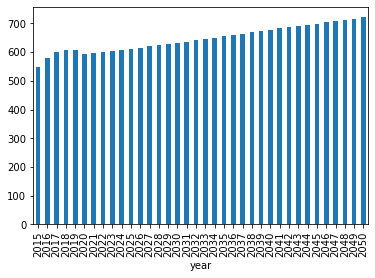

In [28]:
# industry: Gross value added in Bil. (de: Mrd.) EUR
df_driver_industry, df_driver_cts = data.read_activity_drivers()
(df_driver_industry.sum(axis=1)/1000000).plot(kind='bar')

<AxesSubplot:xlabel='year'>

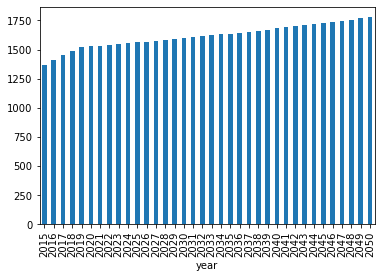

In [32]:
# industry: Energy reference area in Mio. m², driven by employment rates
(df_driver_cts.sum(axis=1)/1000000).plot(kind='bar')

### 3.2 Efficiency effect

Efficiency is added to the activity effect and has a decreasing effect on energy consumption. Fixed energy efficiency improvement rates are defined up to 2035. After 2035 the rates are halved.

In [69]:
eff_rate_el_CTS = (pd.read_excel(config.data_in('temporal', 'Efficiency_Enhancement_Rates_Applications.xlsx'), sheet_name="eff_enhance_el_cts").set_index('until year'))
eff_rate_el_industry = (pd.read_excel(config.data_in('temporal', 'Efficiency_Enhancement_Rates_Applications.xlsx'), sheet_name="eff_enhance_el_industry").set_index('until year'))
eff_rate_gas_CTS = (pd.read_excel(config.data_in('temporal', 'Efficiency_Enhancement_Rates_Applications.xlsx'), sheet_name="eff_enhance_gas_cts").set_index('until year'))
eff_rate_gas_industry = (pd.read_excel(config.data_in('temporal', 'Efficiency_Enhancement_Rates_Applications.xlsx'), sheet_name="eff_enhance_gas_industry").set_index('until year'))

In [71]:
eff_rate_el_CTS

,Beleuchtung,IKT,Klimakälte,Prozesskälte,Mechanische \nEnergie,Prozesswärme,Raumwärme,Warmwasser
until year,,,,,,,,
2035,0.030,0.0050,-0.004,0.0170,0.0330,0.002,0.012,0.012
2050,0.015,0.0025,-0.002,0.0085,0.0165,0.001,0.006,0.006


test

In [2]:
df_industry_app_eff_gas=spatial.disagg_applications_eff(source='gas', sector='industry', disagg_ph=True, year=2015).sum()

In [3]:
df_industry_app_eff_gas

WZ  AWB                               
5   Mechanische \nEnergie                   5230.632478
    Nichtenergetischer Erdgasverbrauch         0.000000
    Prozesswärme 100°C-200°C              135996.444429
    Prozesswärme 200°C-500°C               46833.212651
    Prozesswärme <100°C                    21165.009563
                                              ...      
33  Prozesswärme 200°C-500°C              104415.549404
    Prozesswärme <100°C                    47187.796365
    Prozesswärme >500°C                        0.000000
    Raumwärme                             222351.573794
    Warmwasser                             20213.779436
Length: 232, dtype: float64

<AxesSubplot:xlabel='WZ'>

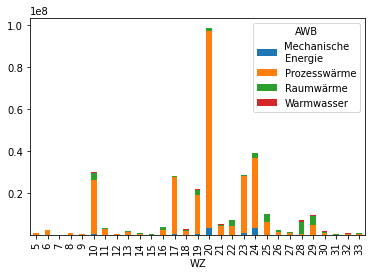

In [160]:
df_industry_app_eff_gas.unstack().plot(kind='bar', stacked=True)

In [4]:
df_industry_app_eff_gas=pd.DataFrame()
for year in range(2018,2051):
    df_industry_app_eff_gas[year]=spatial.disagg_applications_eff(source='gas', sector='industry', disagg_ph=True, year=year).sum()

2022-04-22 15:09:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-04-22 15:09:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
2022-04-22 15:09:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2019&&value=gt.0.0
2022-04-22 15:09:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-04-22 15:09:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2019&&value=gt.0.0
2022-04-22 15:09:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
2022-04-22 15:09:55 di

2022-04-22 15:14:36 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:14:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 15:14:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 15:14:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 15:14:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 15:14:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.0
2022-04-22 15:14:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2026&&value=gt.0.

2022-04-22 15:14:59 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:15:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 15:15:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 15:15:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 15:15:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 15:15:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 15:15:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-04-22 15:15:06 disaggregator.config: INFO

2022-04-22 15:15:23 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:15:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 15:15:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 15:15:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 15:15:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 15:15:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 15:15:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.

2022-04-22 15:15:46 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:15:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 15:15:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 15:15:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 15:15:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 15:15:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 15:15:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 15:15:53 disaggregator.config: INFO

2022-04-22 15:16:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:16:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 15:16:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 15:16:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 15:16:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 15:16:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 15:16:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.

2022-04-22 15:16:30 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:16:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 15:16:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 15:16:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 15:16:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 15:16:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 15:16:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 15:16:37 disaggregator.config: INFO

2022-04-22 15:16:47 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:16:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 15:16:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 15:16:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 15:16:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 15:16:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 15:16:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.

2022-04-22 15:17:14 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:17:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 15:17:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 15:17:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 15:17:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 15:17:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 15:17:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 15:17:21 disaggregator.config: INFO

2022-04-22 15:17:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:17:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 15:17:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 15:17:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 15:17:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 15:17:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 15:17:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-04-22 15:18:01 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:18:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 15:18:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 15:18:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 15:18:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 15:18:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 15:18:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 15:18:07 disaggregator.config: INFO

2022-04-22 15:18:19 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:18:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 15:18:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 15:18:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 15:18:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 15:18:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 15:18:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.

2022-04-22 15:18:48 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:18:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 15:18:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 15:18:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 15:18:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 15:18:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 15:18:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 15:18:54 disaggregator.config: INFO

2022-04-22 15:19:07 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:19:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 15:19:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 15:19:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 15:19:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 15:19:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 15:19:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.

2022-04-22 15:19:40 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:19:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 15:19:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 15:19:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 15:19:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 15:19:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 15:19:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 15:19:46 disaggregator.config: INFO

2022-04-22 15:20:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:20:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 15:20:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 15:20:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 15:20:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 15:20:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 15:20:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.

2022-04-22 15:20:36 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:20:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 15:20:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 15:20:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 15:20:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 15:20:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 15:20:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 15:20:44 disaggregator.config: INFO

2022-04-22 15:20:59 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:21:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 15:21:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 15:21:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 15:21:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 15:21:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 15:21:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.

2022-04-22 15:21:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:21:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 15:21:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 15:21:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 15:21:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 15:21:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 15:21:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 15:21:39 disaggregator.config: INFO

2022-04-22 15:21:55 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:21:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 15:21:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 15:21:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 15:21:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 15:22:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 15:22:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-04-22 15:22:35 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:22:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 15:22:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 15:22:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 15:22:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 15:22:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 15:22:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 15:22:47 disaggregator.config: INFO

2022-04-22 15:23:03 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:23:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 15:23:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 15:23:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 15:23:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 15:23:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 15:23:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.

2022-04-22 15:23:41 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:23:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 15:23:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 15:23:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 15:23:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 15:23:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 15:23:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 15:23:48 disaggregator.config: INFO

2022-04-22 15:24:05 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:24:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 15:24:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 15:24:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 15:24:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 15:24:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 15:24:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.

2022-04-22 15:24:42 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:24:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 15:24:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 15:24:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 15:24:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 15:24:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 15:24:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 15:24:48 disaggregator.config: INFO

2022-04-22 15:25:06 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:25:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 15:25:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 15:25:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 15:25:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 15:25:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 15:25:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.

2022-04-22 15:25:44 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:25:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 15:25:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 15:25:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 15:25:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 15:25:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 15:25:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 15:25:51 disaggregator.config: INFO

2022-04-22 15:26:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:26:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 15:26:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 15:26:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 15:26:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 15:26:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 15:26:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.

2022-04-22 15:26:49 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:26:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 15:26:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 15:26:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 15:26:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 15:26:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 15:26:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 15:26:55 disaggregator.config: INFO

2022-04-22 15:27:15 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:27:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 15:27:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 15:27:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 15:27:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 15:27:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 15:27:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.

2022-04-22 15:27:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:27:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 15:28:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 15:28:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 15:28:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 15:28:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 15:28:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 15:28:04 disaggregator.config: INFO

2022-04-22 15:28:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:28:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 15:28:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 15:28:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 15:28:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 15:28:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 15:28:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.

2022-04-22 15:29:14 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:29:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 15:29:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 15:29:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 15:29:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 15:29:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 15:29:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 15:29:20 disaggregator.config: INFO

2022-04-22 15:29:45 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:29:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 15:29:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 15:29:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 15:29:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 15:29:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 15:29:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.

2022-04-22 15:30:30 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:30:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 15:30:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 15:30:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 15:30:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 15:30:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 15:30:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 15:30:36 disaggregator.config: INFO

2022-04-22 15:30:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:30:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 15:31:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 15:31:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 15:31:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 15:31:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 15:31:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.

2022-04-22 15:31:43 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:31:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 15:31:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 15:31:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 15:31:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 15:31:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 15:31:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 15:31:49 disaggregator.config: INFO

2022-04-22 15:32:11 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:32:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 15:32:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 15:32:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 15:32:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 15:32:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 15:32:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.

2022-04-22 15:32:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:32:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2050&&value=gt.0.0
2022-04-22 15:33:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 15:33:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 15:33:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 15:33:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 15:33:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 15:33:04 disaggregator.config: INFO

2022-04-22 15:33:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:33:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2050&&value=gt.0.0
2022-04-22 15:33:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 15:33:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 15:33:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 15:33:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 15:33:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.

2022-04-22 15:34:14 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [9]:
df_industry_app_eff_gas.to_csv('./data_out/Diss/industry_gas_app_eff_year.csv')

In [5]:
df_cts_app_eff_gas=pd.DataFrame()
for year in range(2018,2051):
    df_cts_app_eff_gas[year]=spatial.disagg_applications_eff(source='gas', sector='CTS', disagg_ph=True, year=year).sum()

2022-04-22 15:34:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-04-22 15:34:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:34:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2019&&value=gt.0.0
2022-04-22 15:34:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-04-22 15:34:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2019&&value=gt.0.0
2022-04-22 15:34:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.

2022-04-22 15:39:21 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:39:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 15:39:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 15:39:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 15:39:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 15:39:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.0
2022-04-22 15:39:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2026&&value=gt.0.

2022-04-22 15:39:46 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:39:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 15:39:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 15:39:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 15:39:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 15:39:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 15:39:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:40:01 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:40:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 15:40:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 15:40:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 15:40:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 15:40:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 15:40:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.

2022-04-22 15:40:24 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:40:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 15:40:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 15:40:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 15:40:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 15:40:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 15:40:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:40:40 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:40:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 15:40:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 15:40:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 15:40:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 15:40:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 15:40:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.

2022-04-22 15:41:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:41:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 15:41:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 15:41:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 15:41:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 15:41:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 15:41:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:41:20 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:41:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 15:41:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 15:41:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 15:41:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 15:41:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 15:41:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.

2022-04-22 15:41:45 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:41:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 15:41:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 15:41:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 15:41:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 15:41:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 15:41:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:42:03 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:42:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 15:42:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 15:42:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 15:42:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 15:42:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 15:42:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-04-22 15:42:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:42:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 15:42:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 15:42:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 15:42:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 15:42:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 15:42:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:42:51 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:42:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 15:42:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 15:42:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 15:42:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 15:42:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 15:42:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.

2022-04-22 15:43:22 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:43:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 15:43:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 15:43:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 15:43:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 15:43:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 15:43:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:43:42 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:43:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 15:43:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 15:43:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 15:43:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 15:43:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 15:43:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.

2022-04-22 15:44:11 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:44:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 15:44:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 15:44:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 15:44:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 15:44:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 15:44:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:44:31 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:44:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 15:44:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 15:44:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 15:44:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 15:44:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 15:44:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.

2022-04-22 15:45:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:45:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 15:45:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 15:45:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 15:45:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 15:45:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 15:45:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:45:25 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:45:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 15:45:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 15:45:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 15:45:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 15:45:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 15:45:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.

2022-04-22 15:45:56 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:45:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 15:45:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 15:45:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 15:46:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 15:46:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 15:46:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:46:18 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:46:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 15:46:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 15:46:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 15:46:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 15:46:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 15:46:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-04-22 15:46:53 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:46:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 15:46:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 15:46:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 15:46:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 15:46:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 15:46:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:47:16 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:47:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 15:47:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 15:47:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 15:47:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 15:47:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 15:47:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.

2022-04-22 15:47:51 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:47:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 15:47:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 15:47:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 15:47:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 15:47:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 15:47:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:48:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:48:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 15:48:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 15:48:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 15:48:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 15:48:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 15:48:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.

2022-04-22 15:49:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:49:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 15:49:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 15:49:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 15:49:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 15:49:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 15:49:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:49:25 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:49:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 15:49:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 15:49:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 15:49:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 15:49:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 15:49:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.

2022-04-22 15:50:10 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:50:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 15:50:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 15:50:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 15:50:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 15:50:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 15:50:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:50:37 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:50:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 15:50:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 15:50:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 15:50:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 15:50:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 15:50:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.

2022-04-22 15:51:16 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:51:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 15:51:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 15:51:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 15:51:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 15:51:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 15:51:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:51:49 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:51:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 15:51:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 15:51:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 15:51:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 15:51:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 15:51:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.

2022-04-22 15:52:36 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:52:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 15:52:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 15:52:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 15:52:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 15:52:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 15:52:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:53:12 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:53:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 15:53:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 15:53:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 15:53:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 15:53:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 15:53:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.

2022-04-22 15:53:56 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:53:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 15:53:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 15:53:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 15:54:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 15:54:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 15:54:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:54:25 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:54:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 15:54:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 15:54:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 15:54:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 15:54:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 15:54:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.

2022-04-22 15:55:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:55:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 15:55:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 15:55:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 15:55:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 15:55:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 15:55:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:55:40 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:55:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 15:55:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 15:55:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 15:55:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 15:55:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 15:55:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.

2022-04-22 15:56:26 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:56:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 15:56:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 15:56:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 15:56:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 15:56:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 15:56:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:57:03 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:57:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 15:57:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 15:57:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 15:57:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 15:57:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 15:57:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.

2022-04-22 15:57:55 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 15:57:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2050&&value=gt.0.0
2022-04-22 15:57:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 15:57:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 15:57:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 15:57:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 15:58:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 15:58:24 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 15:58:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2050&&value=gt.0.0
2022-04-22 15:58:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 15:58:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 15:58:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 15:58:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 15:58:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.

2022-04-22 15:59:11 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.


In [10]:
df_cts_app_eff_gas.to_csv('./data_out/Diss/cts_gas_app_eff_year.csv')

In [6]:
df_industry_app_eff_el=pd.DataFrame()
for year in range(2018,2051):
    df_industry_app_eff_el[year]=spatial.disagg_applications_eff(source='power', sector='industry', disagg_ph=True, year=year).sum()

2022-04-22 15:59:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-04-22 15:59:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 15:59:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2019&&value=gt.0.0
2022-04-22 15:59:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-04-22 15:59:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2019&&value=gt.0.0
2022-04-22 15:59:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe

2022-04-22 16:03:59 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:04:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 16:04:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 16:04:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 16:04:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 16:04:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.0
2022-04-22 16:04:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2026&&value=gt.0.

2022-04-22 16:04:20 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:04:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 16:04:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 16:04:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 16:04:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 16:04:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 16:04:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:04:35 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:04:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 16:04:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 16:04:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 16:04:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 16:04:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 16:04:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.

2022-04-22 16:04:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:05:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 16:05:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 16:05:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 16:05:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 16:05:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 16:05:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:05:14 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:05:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 16:05:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 16:05:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 16:05:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 16:05:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 16:05:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.

2022-04-22 16:05:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:05:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 16:05:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 16:05:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 16:05:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 16:05:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 16:05:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:05:55 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:05:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 16:05:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 16:05:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 16:05:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 16:06:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 16:06:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.

2022-04-22 16:06:20 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:06:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 16:06:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 16:06:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 16:06:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 16:06:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 16:06:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:06:36 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:06:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 16:06:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 16:06:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 16:06:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 16:06:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 16:06:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-04-22 16:07:03 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:07:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 16:07:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 16:07:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 16:07:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 16:07:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 16:07:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:07:21 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:07:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 16:07:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 16:07:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 16:07:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 16:07:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 16:07:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.

2022-04-22 16:07:53 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:07:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 16:07:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 16:07:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 16:07:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 16:07:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 16:07:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:08:15 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:08:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 16:08:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 16:08:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 16:08:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 16:08:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 16:08:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.

2022-04-22 16:08:45 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:08:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 16:08:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 16:08:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 16:08:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 16:08:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 16:08:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:09:05 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:09:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 16:09:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 16:09:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 16:09:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 16:09:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 16:09:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.

2022-04-22 16:09:36 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:09:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 16:09:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 16:09:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 16:09:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 16:09:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 16:09:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:09:56 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:09:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 16:09:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 16:09:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 16:10:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 16:10:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 16:10:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.

2022-04-22 16:10:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:10:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 16:10:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 16:10:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 16:10:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 16:10:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 16:10:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:10:54 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:10:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 16:10:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 16:10:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 16:10:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 16:11:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 16:11:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-04-22 16:11:29 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:11:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 16:11:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 16:11:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 16:11:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 16:11:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 16:11:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:11:52 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:11:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 16:11:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 16:11:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 16:11:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 16:11:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 16:11:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.

2022-04-22 16:12:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:12:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 16:12:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 16:12:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 16:12:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 16:12:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 16:12:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:12:50 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:12:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 16:12:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 16:12:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 16:12:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 16:12:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 16:12:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.

2022-04-22 16:13:28 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:13:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 16:13:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 16:13:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 16:13:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 16:13:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 16:13:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:13:52 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:13:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 16:13:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 16:13:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 16:13:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 16:13:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 16:13:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.

2022-04-22 16:14:29 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:14:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 16:14:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 16:14:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 16:14:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 16:14:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 16:14:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:14:54 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:14:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 16:14:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 16:14:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 16:14:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 16:14:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 16:15:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.

2022-04-22 16:15:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:15:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 16:15:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 16:15:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 16:15:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 16:15:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 16:15:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:15:59 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:16:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 16:16:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 16:16:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 16:16:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 16:16:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 16:16:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.

2022-04-22 16:16:38 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:16:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 16:16:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 16:16:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 16:16:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 16:16:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 16:16:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:17:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:17:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 16:17:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 16:17:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 16:17:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 16:17:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 16:17:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.

2022-04-22 16:17:45 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:17:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 16:17:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 16:17:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 16:17:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 16:17:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 16:17:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:18:11 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:18:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 16:18:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 16:18:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 16:18:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 16:18:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 16:18:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.

2022-04-22 16:18:54 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:18:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 16:18:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 16:18:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 16:18:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 16:18:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 16:18:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:19:22 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:19:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 16:19:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 16:19:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 16:19:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 16:19:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 16:19:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.

2022-04-22 16:20:05 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:20:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 16:20:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 16:20:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 16:20:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 16:20:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 16:20:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:20:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:20:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 16:20:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 16:20:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 16:20:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 16:20:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 16:20:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.

2022-04-22 16:21:34 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.
2022-04-22 16:21:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2050&&value=gt.0.0
2022-04-22 16:21:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 16:21:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 16:21:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 16:21:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 16:21:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandr

2022-04-22 16:22:15 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:22:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2050&&value=gt.0.0
2022-04-22 16:22:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 16:22:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 16:22:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 16:22:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 16:22:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.

2022-04-22 16:23:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for electricity.


In [11]:
df_industry_app_eff_el.to_csv('./data_out/Diss/industry_elec_app_eff_year.csv')

In [7]:
df_cts_app_eff_el=pd.DataFrame()
for year in range(2018,2051):
    df_cts_app_eff_el[year]=spatial.disagg_applications_eff(source='power', sector='CTS', disagg_ph=True, year=year).sum()

2022-04-22 16:23:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-04-22 16:23:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:23:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2019&&value=gt.0.0
2022-04-22 16:23:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-04-22 16:23:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2019&&value=gt.0.0
2022-04-22 16:23:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.

2022-04-22 16:29:34 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:29:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 16:29:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 16:29:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 16:29:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 16:29:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.0
2022-04-22 16:29:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2026&&value=gt.0.

2022-04-22 16:29:59 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:30:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 16:30:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 16:30:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 16:30:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 16:30:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 16:30:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:30:15 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:30:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 16:30:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 16:30:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 16:30:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 16:30:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 16:30:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.

2022-04-22 16:30:40 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:30:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 16:30:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 16:30:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 16:30:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 16:30:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 16:30:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:30:56 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:30:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 16:30:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 16:31:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 16:31:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 16:31:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 16:31:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.

2022-04-22 16:31:24 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:31:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 16:31:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 16:31:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 16:31:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 16:31:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 16:31:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:31:46 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:31:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 16:31:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 16:31:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 16:31:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 16:31:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 16:31:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.

2022-04-22 16:32:15 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:32:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 16:32:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 16:32:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 16:32:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 16:32:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 16:32:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:32:35 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:32:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 16:32:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 16:32:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 16:32:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 16:32:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 16:32:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-04-22 16:33:06 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:33:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 16:33:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 16:33:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 16:33:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 16:33:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 16:33:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:33:28 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:33:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 16:33:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 16:33:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 16:33:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 16:33:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 16:33:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.

2022-04-22 16:34:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:34:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 16:34:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 16:34:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 16:34:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 16:34:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 16:34:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:34:28 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:34:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 16:34:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 16:34:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 16:34:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 16:34:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 16:34:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.

2022-04-22 16:35:03 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:35:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 16:35:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 16:35:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 16:35:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 16:35:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 16:35:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:35:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:35:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 16:35:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 16:35:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 16:35:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 16:35:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 16:35:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.

2022-04-22 16:36:03 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:36:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 16:36:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 16:36:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 16:36:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 16:36:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 16:36:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:36:26 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:36:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 16:36:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 16:36:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 16:36:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 16:36:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 16:36:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.

2022-04-22 16:37:06 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:37:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 16:37:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 16:37:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 16:37:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 16:37:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 16:37:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:37:30 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:37:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 16:37:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 16:37:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 16:37:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 16:37:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 16:37:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-04-22 16:38:08 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:38:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 16:38:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 16:38:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 16:38:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 16:38:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 16:38:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:38:33 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:38:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 16:38:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 16:38:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 16:38:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 16:38:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 16:38:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.

2022-04-22 16:39:10 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:39:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 16:39:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 16:39:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 16:39:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 16:39:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 16:39:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:39:35 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:39:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 16:39:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 16:39:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 16:39:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 16:39:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 16:39:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.

2022-04-22 16:40:12 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:40:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 16:40:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 16:40:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 16:40:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 16:40:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 16:40:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:40:36 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:40:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 16:40:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 16:40:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 16:40:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 16:40:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 16:40:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.

2022-04-22 16:41:13 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:41:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 16:41:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 16:41:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 16:41:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 16:41:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 16:41:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:41:38 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:41:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 16:41:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 16:41:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 16:41:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 16:41:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 16:41:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.

2022-04-22 16:42:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:42:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 16:42:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 16:42:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 16:42:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 16:42:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 16:42:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:42:43 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:42:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 16:42:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 16:42:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 16:42:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 16:42:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 16:42:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.

2022-04-22 16:43:24 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:43:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 16:43:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 16:43:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 16:43:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 16:43:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 16:43:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:43:50 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:43:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 16:43:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 16:43:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 16:43:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 16:43:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 16:43:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.

2022-04-22 16:44:31 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:44:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 16:44:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 16:44:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 16:44:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 16:44:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 16:44:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:44:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:44:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 16:45:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 16:45:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 16:45:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 16:45:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 16:45:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.

2022-04-22 16:45:42 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:45:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 16:45:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 16:45:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 16:45:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 16:45:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 16:45:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:46:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:46:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 16:46:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 16:46:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 16:46:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 16:46:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 16:46:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.

2022-04-22 16:46:52 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:46:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 16:46:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 16:46:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 16:46:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 16:46:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 16:46:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:47:19 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:47:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 16:47:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 16:47:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 16:47:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 16:47:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 16:47:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.

2022-04-22 16:48:05 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-22 16:48:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2050&&value=gt.0.0
2022-04-22 16:48:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 16:48:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 16:48:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 16:48:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 16:48:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandre

2022-04-22 16:48:35 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 16:48:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2050&&value=gt.0.0
2022-04-22 16:48:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 16:48:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 16:48:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 16:48:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 16:48:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.

2022-04-22 16:49:22 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.


In [12]:
df_cts_app_eff_el.to_csv('./data_out/Diss/cts_elec_app_eff_year.csv')

individual years

In [189]:
df_cts_app_eff_el=spatial.disagg_applications_eff(source='power', sector='CTS', year=2035, use_nuts3code=True)

2022-03-22 10:25:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 10:25:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 10:25:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 10:25:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 10:25:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 10:25:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 10:25:05 disaggregator.config: INFO

2022-03-22 10:25:13 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 10:25:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 10:25:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 10:25:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 10:25:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 10:25:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 10:25:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-03-22 10:25:37 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [200]:
df_cts_app_eff_el.groupby(by='AWB', axis=1, level=[1]).sum().sum()*3.6/1000000


AWB
Beleuchtung              129.576920
IKT                       91.733600
Klimakälte                13.911286
Mechanische \nEnergie     90.289434
Prozesskälte              30.337528
Prozesswärme              25.097382
Raumwärme                 24.909180
Warmwasser                17.606138
dtype: float64

In [192]:
df_cts_app_eff_gas=spatial.disagg_applications_eff(source='gas', sector='CTS', year=2035, use_nuts3code=True)

2022-03-22 10:30:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 10:30:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 10:30:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 10:30:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 10:30:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 10:30:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 10:30:21 disaggregator.config: INFO

2022-03-22 10:30:30 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 10:30:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 10:30:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 10:30:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 10:30:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 10:30:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 10:30:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-03-22 10:30:53 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [205]:
df_industry_app_eff_el=spatial.disagg_applications_eff(source='power', sector='industry', year=2030, use_nuts3code=True)

2022-03-22 10:47:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 10:47:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 10:47:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-03-22 10:47:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-03-22 10:47:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2026&&value=gt.0.0
2022-03-22 10:47:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2025&&value=gt.0.0
2022-03-22 10:47:12 disaggregator.config: INFO

In [206]:
df_industry_app_eff_el.groupby(by='AWB', axis=1, level=[1]).sum().sum().sum()/1000000


196.75377219236236

In [204]:
df_industry_app_eff_el.groupby(by='AWB', axis=1, level=[1]).sum().sum().sum()/1000000


186.35827366509776

In [218]:
df_industry_app_eff_gas_false=spatial.disagg_applications_eff(source='gas', sector='industry', year=2030, use_nuts3code=True, disagg_ph=True, no_self_gen=False)


2022-03-22 11:09:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 11:09:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 11:09:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-03-22 11:09:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-03-22 11:09:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2026&&value=gt.0.0
2022-03-22 11:09:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2025&&value=gt.0.0
2022-03-22 11:09:46 disaggregator.config: INFO

In [219]:
df_industry_app_eff_gas_false.groupby(by='AWB', axis=1, level=[1]).sum().sum().sum()/1000000


290.3597978055346

In [216]:
df_industry_app_eff_gas=spatial.disagg_applications_eff(source='gas', sector='industry', year=2030, use_nuts3code=True, disagg_ph=True,no_self_gen=True)


2022-03-22 11:09:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 11:09:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 11:09:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-03-22 11:09:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-03-22 11:09:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2026&&value=gt.0.0
2022-03-22 11:09:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2025&&value=gt.0.0
2022-03-22 11:09:13 disaggregator.config: INFO

In [220]:
df_industry_app_eff_gas.groupby(by='AWB', axis=1, level=[1]).sum().sum().sum()*3.6/1000000


1045.2952720999247

### 3.3 Effect of changing regional employment

In [102]:
df_emp_short={}
for year in [2005, 2015, 2025, 2035, 2045]:
    df_emp_short[year] = data.employees_per_branch(region_code='natcode_nuts3', year=year)#.sum(axis=1)

2022-03-21 17:28:14 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-03-21 17:28:19 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-03-21 17:28:20 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


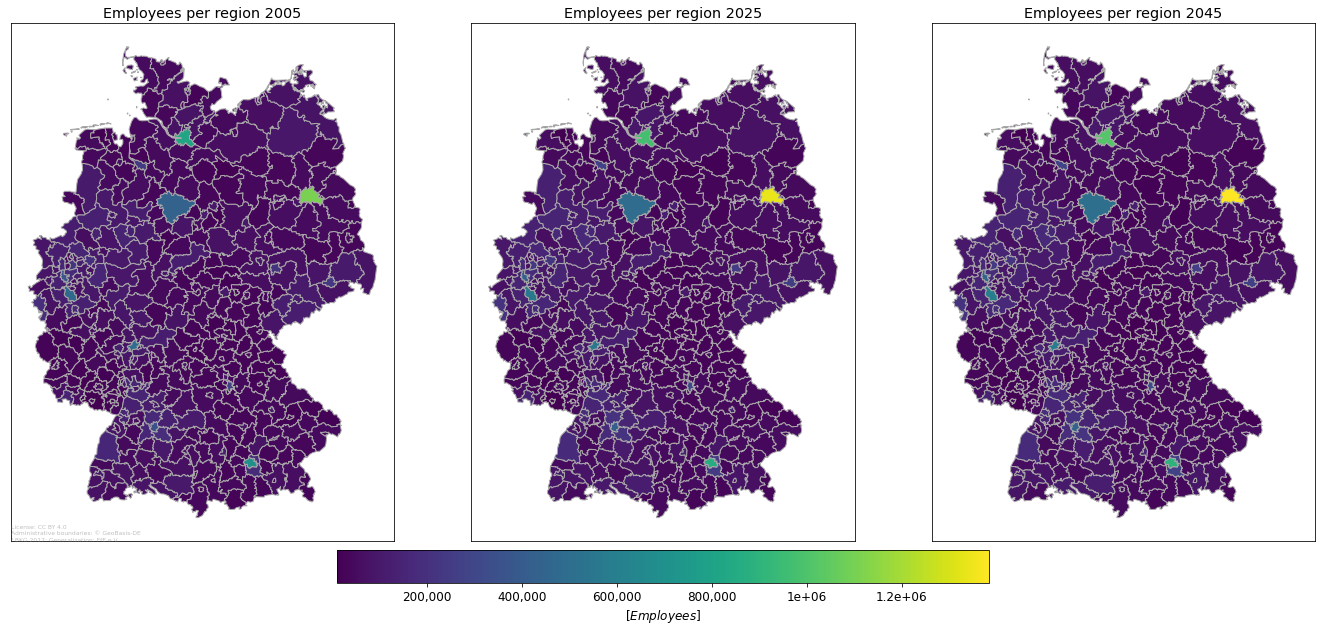

In [134]:
test = pd.concat([df_emp_short[2005].sum(), df_emp_short[2025].sum(), df_emp_short[2045].sum()], axis=1, keys=['2005', '2025', '2045'])
fig, ax = plot.choropleth_map(test, relative=False, unit='Employees', axtitle='Employees per region',
                              add_percentages=False, figsize=(20,20))

In [229]:
# idee: drop berlin, münchen und hamburg
test.drop(['DE300', 'DE212', 'DE600'])

,2005,2025,2045
region_code,,,
DE111,350207.703258,414585.060658,434425.053100
DE112,156623.000000,175435.266795,182528.853756
DE113,185815.000000,212362.438573,218845.974108
DE114,79626.000000,85624.185316,85344.952891
DE115,170881.000000,204314.084761,212898.939211
...,...,...,...
DEG0K,31127.000000,24620.301739,21851.568366
DEG0L,29155.000000,23145.483028,20042.502261
DEG0M,27657.000000,21430.716737,18659.634551


<AxesSubplot:>

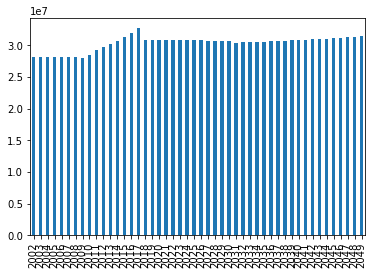

In [85]:
df_emp.sum().plot(kind='bar')

### 3.4 Usage of heat pumps for application "space heating" an energy carrier "electricity"

In [ ]:
# electric appliances used for space heating are modelled as heat pumps
df_temp_cts_HP_2018 = heat.disagg_temporal_applications_hp(source='power', sector='CTS', use_blp=True, use_hp=True, year=2018)

In [228]:
df_temp_cts_HP_2018_detailed = heat.disagg_temporal_applications_hp(source='power', sector='CTS', use_blp=True, use_hp=True, detailed=True, state='MV',year=2018)

2022-03-22 21:11:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-03-22 21:11:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
2022-03-22 21:11:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-03-22 21:11:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
2022-03-22 21:11:42 disaggregator.temporal: INFO     Working on state: MV.
2022-03-22 21:11:42 disaggregator.temporal: INFO     ... creating state-specific load-profiles
2022-03-22 21:11:48 disaggregator.temporal: INFO     ... assigning load-profiles to WZs
2022-03-22 21:11:48 disaggregator.temporal: INFO     Start downloading BLP from Database n

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2022-03-22 21:23:44 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


KeyError: ('13003', '1')

In [ ]:
df_temp_industry_HP_2018 = heat.disagg_temporal_applications_hp(source='power', sector='industry', use_blp=True, use_hp=True, year=2018)

In [ ]:
df_temp_industry_HP_2018_detailed = heat.disagg_temporal_applications_hp(source='power', sector='industry', detailed=True, use_blp=True, use_hp=True, state='MV',year=2018)

### 3.5 Fuel switch effect

#### do for industry 2040


In [1]:
# at first, the user has to import the respective packages and modules from the disaggregator
import pandas as pd
import numpy as np
from disaggregator import config, data, spatial, temporal, plot, heat
import matplotlib.pyplot as plt
# plt.style.use(['science','no-latex'])

In [2]:
years = [2040]
states = ['SH', 'HH', 'NI', 'HB', 'NW', 'HE', 'RP', 'BW', 'BY', 'SL', 'BE',
         'BB', 'MV', 'SN', 'ST', 'TH']
apps = ['Industriekraftwerke', 'Mechanische Energie',
       'Nichtenergetischer Erdgasverbrauch', 'Prozesswärme','Prozesswärme 100°C-200°C',
       'Prozesswärme 200°C-500°C', 'Prozesswärme <100°C',
       'Prozesswärme >500°C', 'Raumwärme', 'Warmwasser']

multi_states = [elem for elem in states for year in years]
multi_years = list(years)*len(states)
tuples = list(zip(*[multi_years, multi_states]))
multicolumn = pd.MultiIndex.from_tuples(tuples, names=["Jahre", "LK"])

df_results_app_industry = pd.DataFrame(index=apps, columns=multicolumn)
df_results_load_curve_industry = pd.DataFrame(columns=multicolumn)
df_results_gas_curve_industry = pd.DataFrame(columns=multicolumn)
# for cts gas--> elec
for year in years:
    df_fs_industry_to_power = heat.sector_fuel_switch_fom_gas(sector='industry', switch_to='power', year=year)
    df_results_regio_industry = pd.DataFrame(index=df_fs_industry_to_power.index, columns=multicolumn)
    df_results_wz_industry = pd.DataFrame(index=df_fs_industry_to_power.columns.unique(level=0), columns=multicolumn)

    for state in states:
        temporal_df_fs_industry_to_power = heat.disagg_temporal_industry_fuel_switch(df_fs_industry_to_power, state=state, year=year)
        hp_temporal_df_fs_industry_to_power = heat.temporal_industry_elec_load_from_fuel_switch(temporal_df_fs_industry_to_power)
        # saving results
        df_results_app_industry[year, state] = hp_temporal_df_fs_industry_to_power.groupby(level=[2], axis=1).sum().sum()
        df_results_wz_industry[year, state] = hp_temporal_df_fs_industry_to_power.groupby(level=[1], axis=1).sum().sum()
        df_results_regio_industry[year, state] = hp_temporal_df_fs_industry_to_power.groupby(level=[0], axis=1).sum().sum()
        df_results_load_curve_industry[year, state] = hp_temporal_df_fs_industry_to_power.sum(axis=1)
        df_results_gas_curve_industry[year, state] = temporal_df_fs_industry_to_power.sum(axis=1)

    df_results_app_industry.to_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_" + str(year) + ".csv")
    df_results_wz_industry.to_csv("./data_out/Diss/12_results_elec_from_switch_industry_wz_" + str(year) + ".csv")
    df_results_regio_industry.sum(axis=1).to_csv("./data_out/Diss/11_results_elec_from_switch_industry_regions_" + str(year) + ".csv")
    df_results_load_curve_industry.to_csv("./data_out/Diss/14_results_elec_from_switch_industry_load_curve_" + str(year) + ".csv")
    df_results_gas_curve_industry.to_csv("./data_out/Diss/14_results_gas_to_switch_industry_gas_curve_" + str(year) + ".csv")


2022-04-28 13:44:13 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-28 13:44:19 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-28 13:44:31 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-28 13:44:36 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-28 13:45:10 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-28 13:45:25 disaggregator.heat: INFO     Working on LK 1/15.
2022-04-28 13:47:32 disaggregator.heat: INFO     Working on LK 2/15.
2022-04-28 13:49:31 disaggregator.heat: INFO     Working on LK 3/15.
2022-04-28 13:51:17 disaggregator.heat: INFO     Working on LK 4/15.
2022-04-28 13:53:08 disaggregator.heat: INFO     Working on LK 5/15.
2022-04-28 13:55:03 disaggregator.heat: INFO     Working on LK 6/15.
2022-04-28 13:56:47 disaggregator.heat: INFO     Working on LK 7/15.
2022-04-28 13:58:22 disaggregator.heat: INFO     Working on LK 8/15.
2022-04-28 13:59:47 disaggregator.heat: INFO     Working on LK 9/15.
2022-04-28 14:00:57 disaggregator.heat: INFO     Working on LK 10/15.
2022-04-28 14:01:59 disaggregator.heat: INFO     Working on LK 11/15.
2022-04-28 14:02:49 disaggregator.heat: INFO     Working on LK 12/15.
2022-04-28 14:03:29 disaggregator.heat: INFO     Working on LK 13/15.
2022-04-28 14:03:

2022-04-28 14:08:50 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-28 14:08:56 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-28 14:09:34 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-28 14:09:36 disaggregator.heat: INFO     Working on LK 1/1.
2022-04-28 14:10:24 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-28 14:11:08 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-28 14:11:53 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-28 14:12:37 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-28 14:13:21 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


2022-04-28 14:13:53 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-28 14:13:59 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-28 14:14:37 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-28 14:15:19 disaggregator.heat: INFO     Working on LK 1/45.
2022-04-28 14:23:28 disaggregator.heat: INFO     Working on LK 2/45.
2022-04-28 14:31:32 disaggregator.heat: INFO     Working on LK 3/45.
2022-04-28 14:39:27 disaggregator.heat: INFO     Working on LK 4/45.
2022-04-28 14:47:15 disaggregator.heat: INFO     Working on LK 5/45.
2022-04-28 14:54:52 disaggregator.heat: INFO     Working on LK 6/45.
2022-04-28 15:02:13 disaggregator.heat: INFO     Working on LK 7/45.
2022-04-28 15:09:26 disaggregator.heat: INFO     Working on LK 8/45.
2022-04-28 15:16:30 disaggregator.heat: INFO     Working on LK 9/45.
2022-04-28 15:23:21 disaggregator.heat: INFO     Working on LK 10/45.
2022-04-28 15:30:03 disaggregator.heat: INFO     Working on LK 11/45.
2022-04-28 15:36:36 disaggregator.heat: INFO     Working on LK 12/45.
2022-04-28 15:42:59 disaggregator.heat: INFO     Working on LK 13/45.
2022-04-28 15:49:

2022-04-28 17:36:33 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-28 17:36:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-28 17:37:17 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-28 17:37:20 disaggregator.heat: INFO     Working on LK 1/2.
2022-04-28 17:37:35 disaggregator.heat: INFO     Working on LK 2/2.
2022-04-28 17:38:24 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-28 17:39:08 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-28 17:39:52 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-28 17:40:36 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-28 17:41:18 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


2022-04-28 17:41:56 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-28 17:42:01 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-28 17:42:39 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-28 17:43:28 disaggregator.heat: INFO     Working on LK 1/53.
2022-04-28 17:53:09 disaggregator.heat: INFO     Working on LK 2/53.
2022-04-28 18:02:38 disaggregator.heat: INFO     Working on LK 3/53.
2022-04-28 18:12:02 disaggregator.heat: INFO     Working on LK 4/53.
2022-04-28 18:21:18 disaggregator.heat: INFO     Working on LK 5/53.
2022-04-28 18:30:21 disaggregator.heat: INFO     Working on LK 6/53.
2022-04-28 18:39:16 disaggregator.heat: INFO     Working on LK 7/53.
2022-04-28 18:48:03 disaggregator.heat: INFO     Working on LK 8/53.
2022-04-28 18:56:42 disaggregator.heat: INFO     Working on LK 9/53.
2022-04-28 19:05:07 disaggregator.heat: INFO     Working on LK 10/53.
2022-04-28 19:13:24 disaggregator.heat: INFO     Working on LK 11/53.
2022-04-28 19:20:50 disaggregator.heat: INFO     Working on LK 12/53.
2022-04-28 19:27:37 disaggregator.heat: INFO     Working on LK 13/53.
2022-04-28 19:35:

2022-04-28 22:21:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-28 22:21:08 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-28 22:21:46 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-28 22:22:11 disaggregator.heat: INFO     Working on LK 1/26.
2022-04-28 22:26:53 disaggregator.heat: INFO     Working on LK 2/26.
2022-04-28 22:31:24 disaggregator.heat: INFO     Working on LK 3/26.
2022-04-28 22:35:44 disaggregator.heat: INFO     Working on LK 4/26.
2022-04-28 22:39:54 disaggregator.heat: INFO     Working on LK 5/26.
2022-04-28 22:43:56 disaggregator.heat: INFO     Working on LK 6/26.
2022-04-28 22:47:46 disaggregator.heat: INFO     Working on LK 7/26.
2022-04-28 22:51:27 disaggregator.heat: INFO     Working on LK 8/26.
2022-04-28 22:54:58 disaggregator.heat: INFO     Working on LK 9/26.
2022-04-28 22:58:18 disaggregator.heat: INFO     Working on LK 10/26.
2022-04-28 23:01:28 disaggregator.heat: INFO     Working on LK 11/26.
2022-04-28 23:04:26 disaggregator.heat: INFO     Working on LK 12/26.
2022-04-28 23:07:13 disaggregator.heat: INFO     Working on LK 13/26.
2022-04-28 23:09:

2022-04-28 23:32:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-28 23:32:14 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-28 23:32:52 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-28 23:33:26 disaggregator.heat: INFO     Working on LK 1/36.
2022-04-28 23:40:11 disaggregator.heat: INFO     Working on LK 2/36.
2022-04-28 23:46:44 disaggregator.heat: INFO     Working on LK 3/36.
2022-04-28 23:53:08 disaggregator.heat: INFO     Working on LK 4/36.
2022-04-28 23:59:20 disaggregator.heat: INFO     Working on LK 5/36.
2022-04-29 00:05:22 disaggregator.heat: INFO     Working on LK 6/36.
2022-04-29 00:11:14 disaggregator.heat: INFO     Working on LK 7/36.
2022-04-29 00:16:52 disaggregator.heat: INFO     Working on LK 8/36.
2022-04-29 00:22:20 disaggregator.heat: INFO     Working on LK 9/36.
2022-04-29 00:27:37 disaggregator.heat: INFO     Working on LK 10/36.
2022-04-29 00:32:44 disaggregator.heat: INFO     Working on LK 11/36.
2022-04-29 00:37:41 disaggregator.heat: INFO     Working on LK 12/36.
2022-04-29 00:42:25 disaggregator.heat: INFO     Working on LK 13/36.
2022-04-29 00:46:

2022-04-29 01:46:10 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-29 01:46:16 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-29 01:46:54 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 01:47:35 disaggregator.heat: INFO     Working on LK 1/44.
2022-04-29 01:55:58 disaggregator.heat: INFO     Working on LK 2/44.
2022-04-29 02:04:03 disaggregator.heat: INFO     Working on LK 3/44.
2022-04-29 02:12:02 disaggregator.heat: INFO     Working on LK 4/44.
2022-04-29 02:19:45 disaggregator.heat: INFO     Working on LK 5/44.
2022-04-29 02:27:21 disaggregator.heat: INFO     Working on LK 6/44.
2022-04-29 02:34:44 disaggregator.heat: INFO     Working on LK 7/44.
2022-04-29 02:42:00 disaggregator.heat: INFO     Working on LK 8/44.
2022-04-29 02:49:05 disaggregator.heat: INFO     Working on LK 9/44.
2022-04-29 02:55:54 disaggregator.heat: INFO     Working on LK 10/44.
2022-04-29 03:01:49 disaggregator.heat: INFO     Working on LK 11/44.
2022-04-29 03:07:46 disaggregator.heat: INFO     Working on LK 12/44.
2022-04-29 03:13:52 disaggregator.heat: INFO     Working on LK 13/44.
2022-04-29 03:19:

2022-04-29 05:02:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-29 05:02:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-29 05:02:47 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 05:04:15 disaggregator.heat: INFO     Working on LK 1/96.
2022-04-29 05:20:06 disaggregator.heat: INFO     Working on LK 2/96.
2022-04-29 05:36:31 disaggregator.heat: INFO     Working on LK 3/96.
2022-04-29 05:52:49 disaggregator.heat: INFO     Working on LK 4/96.
2022-04-29 06:08:59 disaggregator.heat: INFO     Working on LK 5/96.
2022-04-29 06:24:58 disaggregator.heat: INFO     Working on LK 6/96.
2022-04-29 06:40:47 disaggregator.heat: INFO     Working on LK 7/96.
2022-04-29 06:56:30 disaggregator.heat: INFO     Working on LK 8/96.
2022-04-29 07:12:27 disaggregator.heat: INFO     Working on LK 9/96.
2022-04-29 07:28:21 disaggregator.heat: INFO     Working on LK 10/96.
2022-04-29 07:44:12 disaggregator.heat: INFO     Working on LK 11/96.
2022-04-29 08:00:06 disaggregator.heat: INFO     Working on LK 12/96.
2022-04-29 08:15:44 disaggregator.heat: INFO     Working on LK 13/96.
2022-04-29 08:30:

2022-04-29 19:10:34 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-29 19:10:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-29 19:11:12 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 19:11:18 disaggregator.heat: INFO     Working on LK 1/6.
2022-04-29 19:12:08 disaggregator.heat: INFO     Working on LK 2/6.
2022-04-29 19:12:50 disaggregator.heat: INFO     Working on LK 3/6.
2022-04-29 19:13:23 disaggregator.heat: INFO     Working on LK 4/6.
2022-04-29 19:13:48 disaggregator.heat: INFO     Working on LK 5/6.
2022-04-29 19:14:03 disaggregator.heat: INFO     Working on LK 6/6.
2022-04-29 19:14:49 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 19:15:28 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 19:16:07 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 19:16:43 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 19:17:22 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


2022-04-29 19:17:37 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-29 19:17:43 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-29 19:18:14 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 19:18:16 disaggregator.heat: INFO     Working on LK 1/1.
2022-04-29 19:18:57 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 19:19:37 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 19:20:18 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 19:20:54 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 19:21:29 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


2022-04-29 19:21:45 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-29 19:21:50 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-29 19:22:21 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 19:22:37 disaggregator.heat: INFO     Working on LK 1/18.
2022-04-29 19:25:31 disaggregator.heat: INFO     Working on LK 2/18.
2022-04-29 19:28:14 disaggregator.heat: INFO     Working on LK 3/18.
2022-04-29 19:30:45 disaggregator.heat: INFO     Working on LK 4/18.
2022-04-29 19:33:08 disaggregator.heat: INFO     Working on LK 5/18.
2022-04-29 19:35:23 disaggregator.heat: INFO     Working on LK 6/18.
2022-04-29 19:37:28 disaggregator.heat: INFO     Working on LK 7/18.
2022-04-29 19:39:22 disaggregator.heat: INFO     Working on LK 8/18.
2022-04-29 19:41:06 disaggregator.heat: INFO     Working on LK 9/18.
2022-04-29 19:42:44 disaggregator.heat: INFO     Working on LK 10/18.
2022-04-29 19:44:10 disaggregator.heat: INFO     Working on LK 11/18.
2022-04-29 19:45:30 disaggregator.heat: INFO     Working on LK 12/18.
2022-04-29 19:46:40 disaggregator.heat: INFO     Working on LK 13/18.
2022-04-29 19:47:

2022-04-29 19:54:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-29 19:54:22 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-29 19:54:56 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 19:55:03 disaggregator.heat: INFO     Working on LK 1/8.
2022-04-29 19:56:18 disaggregator.heat: INFO     Working on LK 2/8.
2022-04-29 19:57:23 disaggregator.heat: INFO     Working on LK 3/8.
2022-04-29 19:58:19 disaggregator.heat: INFO     Working on LK 4/8.
2022-04-29 19:59:05 disaggregator.heat: INFO     Working on LK 5/8.
2022-04-29 19:59:41 disaggregator.heat: INFO     Working on LK 6/8.
2022-04-29 20:00:08 disaggregator.heat: INFO     Working on LK 7/8.
2022-04-29 20:00:25 disaggregator.heat: INFO     Working on LK 8/8.
2022-04-29 20:01:13 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 20:01:54 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 20:02:35 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 20:03:12 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 20:03:52 disaggregator.data: INFO  

2022-04-29 20:04:19 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-29 20:04:23 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-29 20:04:54 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 20:05:06 disaggregator.heat: INFO     Working on LK 1/13.
2022-04-29 20:07:14 disaggregator.heat: INFO     Working on LK 2/13.
2022-04-29 20:09:10 disaggregator.heat: INFO     Working on LK 3/13.
2022-04-29 20:10:56 disaggregator.heat: INFO     Working on LK 4/13.
2022-04-29 20:12:32 disaggregator.heat: INFO     Working on LK 5/13.
2022-04-29 20:13:59 disaggregator.heat: INFO     Working on LK 6/13.
2022-04-29 20:15:16 disaggregator.heat: INFO     Working on LK 7/13.
2022-04-29 20:16:24 disaggregator.heat: INFO     Working on LK 8/13.
2022-04-29 20:17:23 disaggregator.heat: INFO     Working on LK 9/13.
2022-04-29 20:18:13 disaggregator.heat: INFO     Working on LK 10/13.
2022-04-29 20:18:53 disaggregator.heat: INFO     Working on LK 11/13.
2022-04-29 20:19:22 disaggregator.heat: INFO     Working on LK 12/13.
2022-04-29 20:19:42 disaggregator.heat: INFO     Working on LK 13/13.
2022-04-29 20:20:

2022-04-29 20:23:56 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-29 20:24:01 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-29 20:24:37 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 20:24:50 disaggregator.heat: INFO     Working on LK 1/14.
2022-04-29 20:27:08 disaggregator.heat: INFO     Working on LK 2/14.
2022-04-29 20:29:17 disaggregator.heat: INFO     Working on LK 3/14.
2022-04-29 20:31:13 disaggregator.heat: INFO     Working on LK 4/14.
2022-04-29 20:33:00 disaggregator.heat: INFO     Working on LK 5/14.
2022-04-29 20:34:35 disaggregator.heat: INFO     Working on LK 6/14.
2022-04-29 20:36:03 disaggregator.heat: INFO     Working on LK 7/14.
2022-04-29 20:37:21 disaggregator.heat: INFO     Working on LK 8/14.
2022-04-29 20:38:29 disaggregator.heat: INFO     Working on LK 9/14.
2022-04-29 20:39:29 disaggregator.heat: INFO     Working on LK 10/14.
2022-04-29 20:40:19 disaggregator.heat: INFO     Working on LK 11/14.
2022-04-29 20:41:00 disaggregator.heat: INFO     Working on LK 12/14.
2022-04-29 20:41:29 disaggregator.heat: INFO     Working on LK 13/14.
2022-04-29 20:41:

2022-04-29 20:46:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-29 20:46:06 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-29 20:46:36 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-29 20:46:57 disaggregator.heat: INFO     Working on LK 1/23.
2022-04-29 20:50:48 disaggregator.heat: INFO     Working on LK 2/23.
2022-04-29 20:54:31 disaggregator.heat: INFO     Working on LK 3/23.
2022-04-29 20:58:04 disaggregator.heat: INFO     Working on LK 4/23.
2022-04-29 21:01:27 disaggregator.heat: INFO     Working on LK 5/23.
2022-04-29 21:04:40 disaggregator.heat: INFO     Working on LK 6/23.
2022-04-29 21:07:45 disaggregator.heat: INFO     Working on LK 7/23.
2022-04-29 21:10:39 disaggregator.heat: INFO     Working on LK 8/23.
2022-04-29 21:13:19 disaggregator.heat: INFO     Working on LK 9/23.
2022-04-29 21:15:49 disaggregator.heat: INFO     Working on LK 10/23.
2022-04-29 21:18:05 disaggregator.heat: INFO     Working on LK 11/23.
2022-04-29 21:20:09 disaggregator.heat: INFO     Working on LK 12/23.
2022-04-29 21:22:04 disaggregator.heat: INFO     Working on LK 13/23.
2022-04-29 21:23:

#### loop for cts elec with fuel switch

In [3]:
for year in years:
    df_fs_cts_to_power=heat.sector_fuel_switch_fom_gas(sector='CTS', switch_to='power', year=year)
    for state in states:
        temporal_df_fs_cts_to_power = heat.disagg_temporal_cts_fuel_switch(df_fs_cts_to_power, state=state, year=year)
        replaced_gas_con[year, state] = temporal_df_fs_cts_to_power.sum(axis=1)
        hp_temporal_df_fs_cts_to_power = heat.temporal_cts_elec_load_from_fuel_switch(temporal_df_fs_cts_to_power)
        new_elec_con[year, state] = hp_temporal_df_fs_cts_to_power.sum(axis=1)
replaced_gas_con.to_csv("./data_out/Diss/cts_gas_replaced_by_elec_years.csv")
new_elec_con.to_csv("./data_out/Diss/cts_new_elec_after_switch_years.csv")

Message: No disaggregation on temperature-levels has been done, since there is no data for CTS-sector.
2022-04-25 18:34:04 disaggregator.heat: INFO     Disaggregating detailed total gas consumption for state: SH
2022-04-25 18:34:04 disaggregator.temporal: INFO     Reading total gas temporal disaggregated timeseries from hard drive.
2022-04-25 18:34:09 disaggregator.heat: INFO     Disaggregating detailed temperature independent gas consumption for state: SH
2022-04-25 18:34:09 disaggregator.temporal: INFO     Reading temperature independent gas demand timeseries from hard drive.
2022-04-25 18:34:33 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-25 18:34:46 disaggregator.heat: INFO     Working on LK 1/15.
1
2
3
36
37
38
39
41
42
43
45
46
47
49
50
51
52
53
55
56
58
59
60
61
62
63
64
65
66
68
69
70
71
72
73
74
75
77
78
79
80
81
82
84
85
86
87
88
90
91
92
93
94
95
96
97
98
99
2022-04-25 18:36:58 disaggregator.heat: INFO     Working on LK 2/15.
1
2
3
36
37
38


KeyboardInterrupt: 

#### loop for industry elec with fuel switch

#### do for cts 2045, 2050

In [2]:
# at first, the user has to import the respective packages and modules from the disaggregator
import pandas as pd
import numpy as np
from disaggregator import config, data, spatial, temporal, plot, heat
import matplotlib.pyplot as plt
# plt.style.use(['science','no-latex'])

In [3]:
states = ['SH', 'HH', 'NI', 'HB', 'NW', 'HE', 'RP', 'BW', 'BY', 'SL', 'BE',
         'BB', 'MV', 'SN', 'ST', 'TH']
years = years = [2045, 2050]

multi_states = [elem for elem in states for year in years]
multi_years = list(years)*len(states)
tuples = list(zip(*[multi_years, multi_states]))
multicolumn = pd.MultiIndex.from_tuples(tuples, names=["Jahre", "LK"])
new_elec_con_ind = pd.DataFrame(columns=multicolumn)
replaced_gas_con_ind = pd.DataFrame(columns=multicolumn)

In [4]:
for year in years:
    df_fs_industry_to_power=heat.sector_fuel_switch_fom_gas(sector='industry', switch_to='power', year=year)
    for state in states:
        temporal_df_fs_industry_to_power = heat.disagg_temporal_industry_fuel_switch(df_fs_industry_to_power, state=state, year=year)
        replaced_gas_con_ind[year, state] = temporal_df_fs_industry_to_power.sum(axis=1)
        hp_temporal_df_fs_industry_to_power = heat.temporal_industry_elec_load_from_fuel_switch(temporal_df_fs_industry_to_power)
        new_elec_con_ind[year, state] = hp_temporal_df_fs_industry_to_power.sum(axis=1)
replaced_gas_con_ind.to_csv("./data_out/Diss/industry_gas_replaced_by_elec_years.csv")
new_elec_con_ind.to_csv("./data_out/Diss/industry_new_elec_after_switch_years.csv")

2022-04-25 19:05:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-25 19:05:44 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-25 19:05:52 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-25 19:05:57 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-25 19:06:26 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-25 19:06:37 disaggregator.heat: INFO     Working on LK 1/15.
2022-04-25 19:08:00 disaggregator.heat: INFO     Working on LK 2/15.
2022-04-25 19:09:20 disaggregator.heat: INFO     Working on LK 3/15.
2022-04-25 19:10:34 disaggregator.heat: INFO     Working on LK 4/15.
2022-04-25 19:11:43 disaggregator.heat: INFO     Working on LK 5/15.
2022-04-25 19:12:46 disaggregator.heat: INFO     Working on LK 6/15.
2022-04-25 19:13:43 disaggregator.heat: INFO     Working on LK 7/15.
2022-04-25 19:14:35 disaggregator.heat: INFO     Working on LK 8/15.
2022-04-25 19:15:22 disaggregator.heat: INFO     Working on LK 9/15.
2022-04-25 19:16:01 disaggregator.heat: INFO     Working on LK 10/15.
2022-04-25 19:16:34 disaggregator.heat: INFO     Working on LK 11/15.
2022-04-25 19:17:01 disaggregator.heat: INFO     Working on LK 12/15.
2022-04-25 19:17:22 disaggregator.heat: INFO     Working on LK 13/15.
2022-04-25 19:17:

2022-04-25 19:21:11 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-25 19:21:15 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-25 19:21:41 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-25 19:21:43 disaggregator.heat: INFO     Working on LK 1/1.
2022-04-25 19:22:17 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-25 19:22:47 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-25 19:23:30 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-25 19:24:02 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-25 19:24:33 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


2022-04-25 19:24:52 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-25 19:24:56 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-25 19:25:24 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-25 19:26:13 disaggregator.heat: INFO     Working on LK 1/45.
2022-04-25 19:30:12 disaggregator.heat: INFO     Working on LK 2/45.
2022-04-25 19:34:00 disaggregator.heat: INFO     Working on LK 3/45.
2022-04-25 19:37:40 disaggregator.heat: INFO     Working on LK 4/45.
2022-04-25 19:41:14 disaggregator.heat: INFO     Working on LK 5/45.
2022-04-25 19:44:46 disaggregator.heat: INFO     Working on LK 6/45.
2022-04-25 19:48:31 disaggregator.heat: INFO     Working on LK 7/45.
2022-04-25 19:52:28 disaggregator.heat: INFO     Working on LK 8/45.
2022-04-25 19:56:17 disaggregator.heat: INFO     Working on LK 9/45.
2022-04-25 20:00:03 disaggregator.heat: INFO     Working on LK 10/45.
2022-04-25 20:03:42 disaggregator.heat: INFO     Working on LK 11/45.
2022-04-25 20:07:16 disaggregator.heat: INFO     Working on LK 12/45.
2022-04-25 20:10:45 disaggregator.heat: INFO     Working on LK 13/45.
2022-04-25 20:14:

2022-04-25 21:13:46 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-25 21:13:49 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-25 21:14:15 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-25 21:14:17 disaggregator.heat: INFO     Working on LK 1/2.
2022-04-25 21:14:26 disaggregator.heat: INFO     Working on LK 2/2.
2022-04-25 21:14:58 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-25 21:15:29 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-25 21:16:00 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-25 21:16:32 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-25 21:17:02 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


2022-04-25 21:17:24 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-25 21:17:28 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-25 21:17:55 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-25 21:18:33 disaggregator.heat: INFO     Working on LK 1/53.
2022-04-25 21:23:42 disaggregator.heat: INFO     Working on LK 2/53.
2022-04-25 21:28:56 disaggregator.heat: INFO     Working on LK 3/53.
2022-04-25 21:34:03 disaggregator.heat: INFO     Working on LK 4/53.
2022-04-25 21:39:04 disaggregator.heat: INFO     Working on LK 5/53.
2022-04-25 21:44:02 disaggregator.heat: INFO     Working on LK 6/53.
2022-04-25 21:48:52 disaggregator.heat: INFO     Working on LK 7/53.
2022-04-25 21:53:39 disaggregator.heat: INFO     Working on LK 8/53.
2022-04-25 21:58:19 disaggregator.heat: INFO     Working on LK 9/53.
2022-04-25 22:02:54 disaggregator.heat: INFO     Working on LK 10/53.
2022-04-25 22:07:25 disaggregator.heat: INFO     Working on LK 11/53.
2022-04-25 22:11:48 disaggregator.heat: INFO     Working on LK 12/53.
2022-04-25 22:16:06 disaggregator.heat: INFO     Working on LK 13/53.
2022-04-25 22:20:

2022-04-25 23:51:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-25 23:52:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-25 23:52:30 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-25 23:52:48 disaggregator.heat: INFO     Working on LK 1/26.
2022-04-25 23:55:07 disaggregator.heat: INFO     Working on LK 2/26.
2022-04-25 23:57:20 disaggregator.heat: INFO     Working on LK 3/26.
2022-04-25 23:59:29 disaggregator.heat: INFO     Working on LK 4/26.
2022-04-26 00:01:30 disaggregator.heat: INFO     Working on LK 5/26.
2022-04-26 00:03:27 disaggregator.heat: INFO     Working on LK 6/26.
2022-04-26 00:05:20 disaggregator.heat: INFO     Working on LK 7/26.
2022-04-26 00:07:06 disaggregator.heat: INFO     Working on LK 8/26.
2022-04-26 00:08:46 disaggregator.heat: INFO     Working on LK 9/26.
2022-04-26 00:10:19 disaggregator.heat: INFO     Working on LK 10/26.
2022-04-26 00:11:49 disaggregator.heat: INFO     Working on LK 11/26.
2022-04-26 00:13:14 disaggregator.heat: INFO     Working on LK 12/26.
2022-04-26 00:14:33 disaggregator.heat: INFO     Working on LK 13/26.
2022-04-26 00:15:

2022-04-26 00:28:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 00:28:08 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 00:28:35 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 00:28:59 disaggregator.heat: INFO     Working on LK 1/36.
2022-04-26 00:32:19 disaggregator.heat: INFO     Working on LK 2/36.
2022-04-26 00:35:39 disaggregator.heat: INFO     Working on LK 3/36.
2022-04-26 00:39:02 disaggregator.heat: INFO     Working on LK 4/36.
2022-04-26 00:42:24 disaggregator.heat: INFO     Working on LK 5/36.
2022-04-26 00:45:41 disaggregator.heat: INFO     Working on LK 6/36.
2022-04-26 00:48:53 disaggregator.heat: INFO     Working on LK 7/36.
2022-04-26 00:51:58 disaggregator.heat: INFO     Working on LK 8/36.
2022-04-26 00:54:57 disaggregator.heat: INFO     Working on LK 9/36.
2022-04-26 00:57:48 disaggregator.heat: INFO     Working on LK 10/36.
2022-04-26 01:00:35 disaggregator.heat: INFO     Working on LK 11/36.
2022-04-26 01:03:16 disaggregator.heat: INFO     Working on LK 12/36.
2022-04-26 01:05:50 disaggregator.heat: INFO     Working on LK 13/36.
2022-04-26 01:08:

2022-04-26 01:41:28 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 01:41:31 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 01:41:58 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 01:42:27 disaggregator.heat: INFO     Working on LK 1/44.
2022-04-26 01:46:36 disaggregator.heat: INFO     Working on LK 2/44.
2022-04-26 01:50:42 disaggregator.heat: INFO     Working on LK 3/44.
2022-04-26 01:54:43 disaggregator.heat: INFO     Working on LK 4/44.
2022-04-26 01:58:41 disaggregator.heat: INFO     Working on LK 5/44.
2022-04-26 02:02:38 disaggregator.heat: INFO     Working on LK 6/44.
2022-04-26 02:06:39 disaggregator.heat: INFO     Working on LK 7/44.
2022-04-26 02:10:35 disaggregator.heat: INFO     Working on LK 8/44.
2022-04-26 02:14:25 disaggregator.heat: INFO     Working on LK 9/44.
2022-04-26 02:18:09 disaggregator.heat: INFO     Working on LK 10/44.
2022-04-26 02:21:46 disaggregator.heat: INFO     Working on LK 11/44.
2022-04-26 02:25:19 disaggregator.heat: INFO     Working on LK 12/44.
2022-04-26 02:28:43 disaggregator.heat: INFO     Working on LK 13/44.
2022-04-26 02:32:

2022-04-26 03:29:37 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 03:29:41 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 03:30:06 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 03:31:08 disaggregator.heat: INFO     Working on LK 1/96.
2022-04-26 03:40:09 disaggregator.heat: INFO     Working on LK 2/96.
2022-04-26 03:49:23 disaggregator.heat: INFO     Working on LK 3/96.
2022-04-26 03:59:08 disaggregator.heat: INFO     Working on LK 4/96.
2022-04-26 04:08:48 disaggregator.heat: INFO     Working on LK 5/96.
2022-04-26 04:18:27 disaggregator.heat: INFO     Working on LK 6/96.
2022-04-26 04:27:56 disaggregator.heat: INFO     Working on LK 7/96.
2022-04-26 04:37:20 disaggregator.heat: INFO     Working on LK 8/96.
2022-04-26 04:46:40 disaggregator.heat: INFO     Working on LK 9/96.
2022-04-26 04:55:54 disaggregator.heat: INFO     Working on LK 10/96.
2022-04-26 05:05:04 disaggregator.heat: INFO     Working on LK 11/96.
2022-04-26 05:14:06 disaggregator.heat: INFO     Working on LK 12/96.
2022-04-26 05:23:05 disaggregator.heat: INFO     Working on LK 13/96.
2022-04-26 05:31:

2022-04-26 11:38:53 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 11:38:56 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 11:39:23 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 11:39:28 disaggregator.heat: INFO     Working on LK 1/6.
2022-04-26 11:39:58 disaggregator.heat: INFO     Working on LK 2/6.
2022-04-26 11:40:23 disaggregator.heat: INFO     Working on LK 3/6.
2022-04-26 11:40:43 disaggregator.heat: INFO     Working on LK 4/6.
2022-04-26 11:40:58 disaggregator.heat: INFO     Working on LK 5/6.
2022-04-26 11:41:07 disaggregator.heat: INFO     Working on LK 6/6.
2022-04-26 11:41:43 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 11:42:14 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 11:42:43 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 11:43:15 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 11:43:46 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


2022-04-26 11:43:56 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 11:44:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 11:44:26 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 11:44:28 disaggregator.heat: INFO     Working on LK 1/1.
2022-04-26 11:45:00 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 11:45:31 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 11:46:02 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 11:46:34 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 11:47:04 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


2022-04-26 11:47:15 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 11:47:19 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 11:47:45 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 11:47:57 disaggregator.heat: INFO     Working on LK 1/18.
2022-04-26 11:49:33 disaggregator.heat: INFO     Working on LK 2/18.
2022-04-26 11:51:05 disaggregator.heat: INFO     Working on LK 3/18.
2022-04-26 11:52:34 disaggregator.heat: INFO     Working on LK 4/18.
2022-04-26 11:53:58 disaggregator.heat: INFO     Working on LK 5/18.
2022-04-26 11:55:17 disaggregator.heat: INFO     Working on LK 6/18.
2022-04-26 11:56:31 disaggregator.heat: INFO     Working on LK 7/18.
2022-04-26 11:57:39 disaggregator.heat: INFO     Working on LK 8/18.
2022-04-26 11:58:42 disaggregator.heat: INFO     Working on LK 9/18.
2022-04-26 11:59:39 disaggregator.heat: INFO     Working on LK 10/18.
2022-04-26 12:00:31 disaggregator.heat: INFO     Working on LK 11/18.
2022-04-26 12:01:18 disaggregator.heat: INFO     Working on LK 12/18.
2022-04-26 12:01:58 disaggregator.heat: INFO     Working on LK 13/18.
2022-04-26 12:02:

2022-04-26 12:07:13 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 12:07:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 12:07:43 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 12:07:49 disaggregator.heat: INFO     Working on LK 1/8.
2022-04-26 12:08:30 disaggregator.heat: INFO     Working on LK 2/8.
2022-04-26 12:09:06 disaggregator.heat: INFO     Working on LK 3/8.
2022-04-26 12:09:36 disaggregator.heat: INFO     Working on LK 4/8.
2022-04-26 12:10:01 disaggregator.heat: INFO     Working on LK 5/8.
2022-04-26 12:10:22 disaggregator.heat: INFO     Working on LK 6/8.
2022-04-26 12:10:36 disaggregator.heat: INFO     Working on LK 7/8.
2022-04-26 12:10:46 disaggregator.heat: INFO     Working on LK 8/8.
2022-04-26 12:11:23 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 12:11:57 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 12:12:27 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 12:12:58 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 12:13:30 disaggregator.data: INFO  

2022-04-26 12:13:45 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 12:13:49 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 12:14:16 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 12:14:25 disaggregator.heat: INFO     Working on LK 1/13.
2022-04-26 12:15:34 disaggregator.heat: INFO     Working on LK 2/13.
2022-04-26 12:16:38 disaggregator.heat: INFO     Working on LK 3/13.
2022-04-26 12:17:38 disaggregator.heat: INFO     Working on LK 4/13.
2022-04-26 12:18:32 disaggregator.heat: INFO     Working on LK 5/13.
2022-04-26 12:19:22 disaggregator.heat: INFO     Working on LK 6/13.
2022-04-26 12:20:07 disaggregator.heat: INFO     Working on LK 7/13.
2022-04-26 12:20:47 disaggregator.heat: INFO     Working on LK 8/13.
2022-04-26 12:21:20 disaggregator.heat: INFO     Working on LK 9/13.
2022-04-26 12:21:49 disaggregator.heat: INFO     Working on LK 10/13.
2022-04-26 12:22:12 disaggregator.heat: INFO     Working on LK 11/13.
2022-04-26 12:22:30 disaggregator.heat: INFO     Working on LK 12/13.
2022-04-26 12:22:41 disaggregator.heat: INFO     Working on LK 13/13.
2022-04-26 12:23:

2022-04-26 12:25:56 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 12:26:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 12:26:26 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 12:26:36 disaggregator.heat: INFO     Working on LK 1/14.
2022-04-26 12:27:51 disaggregator.heat: INFO     Working on LK 2/14.
2022-04-26 12:29:00 disaggregator.heat: INFO     Working on LK 3/14.
2022-04-26 12:30:05 disaggregator.heat: INFO     Working on LK 4/14.
2022-04-26 12:31:04 disaggregator.heat: INFO     Working on LK 5/14.
2022-04-26 12:32:00 disaggregator.heat: INFO     Working on LK 6/14.
2022-04-26 12:32:50 disaggregator.heat: INFO     Working on LK 7/14.
2022-04-26 12:33:35 disaggregator.heat: INFO     Working on LK 8/14.
2022-04-26 12:34:16 disaggregator.heat: INFO     Working on LK 9/14.
2022-04-26 12:34:51 disaggregator.heat: INFO     Working on LK 10/14.
2022-04-26 12:35:20 disaggregator.heat: INFO     Working on LK 11/14.
2022-04-26 12:35:43 disaggregator.heat: INFO     Working on LK 12/14.
2022-04-26 12:36:00 disaggregator.heat: INFO     Working on LK 13/14.
2022-04-26 12:36:

2022-04-26 12:39:29 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 12:39:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 12:39:59 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 12:40:15 disaggregator.heat: INFO     Working on LK 1/23.
2022-04-26 12:42:18 disaggregator.heat: INFO     Working on LK 2/23.
2022-04-26 12:44:19 disaggregator.heat: INFO     Working on LK 3/23.
2022-04-26 12:46:17 disaggregator.heat: INFO     Working on LK 4/23.
2022-04-26 12:48:11 disaggregator.heat: INFO     Working on LK 5/23.
2022-04-26 12:50:05 disaggregator.heat: INFO     Working on LK 6/23.
2022-04-26 12:51:54 disaggregator.heat: INFO     Working on LK 7/23.
2022-04-26 12:53:37 disaggregator.heat: INFO     Working on LK 8/23.
2022-04-26 12:55:15 disaggregator.heat: INFO     Working on LK 9/23.
2022-04-26 12:56:48 disaggregator.heat: INFO     Working on LK 10/23.
2022-04-26 12:58:14 disaggregator.heat: INFO     Working on LK 11/23.
2022-04-26 12:59:34 disaggregator.heat: INFO     Working on LK 12/23.
2022-04-26 13:00:48 disaggregator.heat: INFO     Working on LK 13/23.
2022-04-26 13:01:

2022-04-26 13:11:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 13:11:08 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 13:11:16 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 13:11:20 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 13:11:41 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 13:11:51 disaggregator.heat: INFO     Working on LK 1/15.
2022-04-26 13:13:09 disaggregator.heat: INFO     Working on LK 2/15.
2022-04-26 13:14:23 disaggregator.heat: INFO     Working on LK 3/15.
2022-04-26 13:15:32 disaggregator.heat: INFO     Working on LK 4/15.
2022-04-26 13:16:37 disaggregator.heat: INFO     Working on LK 5/15.
2022-04-26 13:17:36 disaggregator.heat: INFO     Working on LK 6/15.
2022-04-26 13:18:30 disaggregator.heat: INFO     Working on LK 7/15.
2022-04-26 13:19:18 disaggregator.heat: INFO     Working on LK 8/15.
2022-04-26 13:20:00 disaggregator.heat: INFO     Working on LK 9/15.
2022-04-26 13:20:37 disaggregator.heat: INFO     Working on LK 10/15.
2022-04-26 13:21:09 disaggregator.heat: INFO     Working on LK 11/15.
2022-04-26 13:21:37 disaggregator.heat: INFO     Working on LK 12/15.
2022-04-26 13:21:59 disaggregator.heat: INFO     Working on LK 13/15.
2022-04-26 13:22:

2022-04-26 13:24:55 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 13:24:59 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 13:25:18 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 13:25:20 disaggregator.heat: INFO     Working on LK 1/1.
2022-04-26 13:25:46 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 13:26:09 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 13:26:33 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 13:26:56 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 13:27:19 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


2022-04-26 13:27:37 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 13:27:40 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 13:27:59 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 13:28:28 disaggregator.heat: INFO     Working on LK 1/45.
2022-04-26 13:32:27 disaggregator.heat: INFO     Working on LK 2/45.
2022-04-26 13:36:26 disaggregator.heat: INFO     Working on LK 3/45.
2022-04-26 13:40:22 disaggregator.heat: INFO     Working on LK 4/45.
2022-04-26 13:44:13 disaggregator.heat: INFO     Working on LK 5/45.
2022-04-26 13:47:58 disaggregator.heat: INFO     Working on LK 6/45.
2022-04-26 13:51:38 disaggregator.heat: INFO     Working on LK 7/45.
2022-04-26 13:55:12 disaggregator.heat: INFO     Working on LK 8/45.
2022-04-26 13:58:42 disaggregator.heat: INFO     Working on LK 9/45.
2022-04-26 14:02:06 disaggregator.heat: INFO     Working on LK 10/45.
2022-04-26 14:05:25 disaggregator.heat: INFO     Working on LK 11/45.
2022-04-26 14:08:39 disaggregator.heat: INFO     Working on LK 12/45.
2022-04-26 14:11:49 disaggregator.heat: INFO     Working on LK 13/45.
2022-04-26 14:15:

2022-04-26 15:09:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 15:09:31 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 15:09:53 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 15:09:56 disaggregator.heat: INFO     Working on LK 1/2.
2022-04-26 15:10:05 disaggregator.heat: INFO     Working on LK 2/2.
2022-04-26 15:10:34 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 15:10:58 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 15:11:24 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 15:11:49 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 15:12:13 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


2022-04-26 15:12:36 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 15:12:40 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 15:13:01 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 15:13:36 disaggregator.heat: INFO     Working on LK 1/53.
2022-04-26 15:18:22 disaggregator.heat: INFO     Working on LK 2/53.
2022-04-26 15:23:13 disaggregator.heat: INFO     Working on LK 3/53.
2022-04-26 15:28:01 disaggregator.heat: INFO     Working on LK 4/53.
2022-04-26 15:32:44 disaggregator.heat: INFO     Working on LK 5/53.
2022-04-26 15:37:24 disaggregator.heat: INFO     Working on LK 6/53.
2022-04-26 15:41:58 disaggregator.heat: INFO     Working on LK 7/53.
2022-04-26 15:46:25 disaggregator.heat: INFO     Working on LK 8/53.
2022-04-26 15:50:48 disaggregator.heat: INFO     Working on LK 9/53.
2022-04-26 15:55:08 disaggregator.heat: INFO     Working on LK 10/53.
2022-04-26 15:59:23 disaggregator.heat: INFO     Working on LK 11/53.
2022-04-26 16:03:33 disaggregator.heat: INFO     Working on LK 12/53.
2022-04-26 16:07:36 disaggregator.heat: INFO     Working on LK 13/53.
2022-04-26 16:11:

2022-04-26 17:38:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 17:38:08 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 17:38:29 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 17:38:47 disaggregator.heat: INFO     Working on LK 1/26.
2022-04-26 17:41:13 disaggregator.heat: INFO     Working on LK 2/26.
2022-04-26 17:43:31 disaggregator.heat: INFO     Working on LK 3/26.
2022-04-26 17:45:46 disaggregator.heat: INFO     Working on LK 4/26.
2022-04-26 17:47:58 disaggregator.heat: INFO     Working on LK 5/26.
2022-04-26 17:50:05 disaggregator.heat: INFO     Working on LK 6/26.
2022-04-26 17:52:06 disaggregator.heat: INFO     Working on LK 7/26.
2022-04-26 17:54:02 disaggregator.heat: INFO     Working on LK 8/26.
2022-04-26 17:55:52 disaggregator.heat: INFO     Working on LK 9/26.
2022-04-26 17:57:38 disaggregator.heat: INFO     Working on LK 10/26.
2022-04-26 17:59:18 disaggregator.heat: INFO     Working on LK 11/26.
2022-04-26 18:00:51 disaggregator.heat: INFO     Working on LK 12/26.
2022-04-26 18:02:19 disaggregator.heat: INFO     Working on LK 13/26.
2022-04-26 18:03:

2022-04-26 18:16:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 18:16:05 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 18:16:27 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 18:16:52 disaggregator.heat: INFO     Working on LK 1/36.
2022-04-26 18:20:16 disaggregator.heat: INFO     Working on LK 2/36.
2022-04-26 18:23:31 disaggregator.heat: INFO     Working on LK 3/36.
2022-04-26 18:26:45 disaggregator.heat: INFO     Working on LK 4/36.
2022-04-26 18:29:54 disaggregator.heat: INFO     Working on LK 5/36.
2022-04-26 18:33:00 disaggregator.heat: INFO     Working on LK 6/36.
2022-04-26 18:36:00 disaggregator.heat: INFO     Working on LK 7/36.
2022-04-26 18:38:53 disaggregator.heat: INFO     Working on LK 8/36.
2022-04-26 18:41:41 disaggregator.heat: INFO     Working on LK 9/36.
2022-04-26 18:44:25 disaggregator.heat: INFO     Working on LK 10/36.
2022-04-26 18:47:04 disaggregator.heat: INFO     Working on LK 11/36.
2022-04-26 18:49:36 disaggregator.heat: INFO     Working on LK 12/36.
2022-04-26 18:52:03 disaggregator.heat: INFO     Working on LK 13/36.
2022-04-26 18:54:

2022-04-26 19:25:45 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 19:25:49 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 19:26:10 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 19:26:41 disaggregator.heat: INFO     Working on LK 1/44.
2022-04-26 19:30:51 disaggregator.heat: INFO     Working on LK 2/44.
2022-04-26 19:34:50 disaggregator.heat: INFO     Working on LK 3/44.
2022-04-26 19:38:51 disaggregator.heat: INFO     Working on LK 4/44.
2022-04-26 19:42:47 disaggregator.heat: INFO     Working on LK 5/44.
2022-04-26 19:46:38 disaggregator.heat: INFO     Working on LK 6/44.
2022-04-26 19:50:26 disaggregator.heat: INFO     Working on LK 7/44.
2022-04-26 19:54:07 disaggregator.heat: INFO     Working on LK 8/44.
2022-04-26 19:57:42 disaggregator.heat: INFO     Working on LK 9/44.
2022-04-26 20:01:11 disaggregator.heat: INFO     Working on LK 10/44.
2022-04-26 20:04:34 disaggregator.heat: INFO     Working on LK 11/44.
2022-04-26 20:07:52 disaggregator.heat: INFO     Working on LK 12/44.
2022-04-26 20:11:06 disaggregator.heat: INFO     Working on LK 13/44.
2022-04-26 20:14:

2022-04-26 21:08:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-26 21:08:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-26 21:08:53 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-26 21:09:58 disaggregator.heat: INFO     Working on LK 1/96.
2022-04-26 21:18:56 disaggregator.heat: INFO     Working on LK 2/96.
2022-04-26 21:28:05 disaggregator.heat: INFO     Working on LK 3/96.
2022-04-26 21:37:11 disaggregator.heat: INFO     Working on LK 4/96.
2022-04-26 21:46:11 disaggregator.heat: INFO     Working on LK 5/96.
2022-04-26 21:55:05 disaggregator.heat: INFO     Working on LK 6/96.
2022-04-26 22:03:53 disaggregator.heat: INFO     Working on LK 7/96.
2022-04-26 22:12:30 disaggregator.heat: INFO     Working on LK 8/96.
2022-04-26 22:21:05 disaggregator.heat: INFO     Working on LK 9/96.
2022-04-26 22:29:36 disaggregator.heat: INFO     Working on LK 10/96.
2022-04-26 22:38:01 disaggregator.heat: INFO     Working on LK 11/96.
2022-04-26 22:46:22 disaggregator.heat: INFO     Working on LK 12/96.
2022-04-26 22:54:39 disaggregator.heat: INFO     Working on LK 13/96.
2022-04-26 23:02:

2022-04-27 05:02:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-27 05:02:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-27 05:02:29 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-27 05:02:34 disaggregator.heat: INFO     Working on LK 1/6.
2022-04-27 05:03:07 disaggregator.heat: INFO     Working on LK 2/6.
2022-04-27 05:03:34 disaggregator.heat: INFO     Working on LK 3/6.
2022-04-27 05:03:55 disaggregator.heat: INFO     Working on LK 4/6.
2022-04-27 05:04:11 disaggregator.heat: INFO     Working on LK 5/6.
2022-04-27 05:04:21 disaggregator.heat: INFO     Working on LK 6/6.
2022-04-27 05:04:50 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-27 05:05:15 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-27 05:05:41 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-27 05:06:06 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-27 05:06:32 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


2022-04-27 05:06:42 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-27 05:06:46 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-27 05:07:07 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-27 05:07:09 disaggregator.heat: INFO     Working on LK 1/1.
2022-04-27 05:07:36 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-27 05:08:02 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-27 05:08:26 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-27 05:08:52 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-27 05:09:17 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


2022-04-27 05:09:28 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-27 05:09:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-27 05:09:53 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-27 05:10:06 disaggregator.heat: INFO     Working on LK 1/18.
2022-04-27 05:11:49 disaggregator.heat: INFO     Working on LK 2/18.
2022-04-27 05:13:27 disaggregator.heat: INFO     Working on LK 3/18.
2022-04-27 05:15:01 disaggregator.heat: INFO     Working on LK 4/18.
2022-04-27 05:16:26 disaggregator.heat: INFO     Working on LK 5/18.
2022-04-27 05:17:45 disaggregator.heat: INFO     Working on LK 6/18.
2022-04-27 05:18:59 disaggregator.heat: INFO     Working on LK 7/18.
2022-04-27 05:20:07 disaggregator.heat: INFO     Working on LK 8/18.
2022-04-27 05:21:09 disaggregator.heat: INFO     Working on LK 9/18.
2022-04-27 05:22:07 disaggregator.heat: INFO     Working on LK 10/18.
2022-04-27 05:23:00 disaggregator.heat: INFO     Working on LK 11/18.
2022-04-27 05:23:47 disaggregator.heat: INFO     Working on LK 12/18.
2022-04-27 05:24:27 disaggregator.heat: INFO     Working on LK 13/18.
2022-04-27 05:25:

2022-04-27 05:29:16 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-04-27 05:29:20 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-27 05:29:42 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2022-04-27 05:29:48 disaggregator.heat: INFO     Working on LK 1/8.
2022-04-27 05:30:32 disaggregator.heat: INFO     Working on LK 2/8.


--- Logging error ---
Traceback (most recent call last):
  File "c:\python36\lib\logging\__init__.py", line 998, in emit
    self.flush()
  File "c:\python36\lib\logging\__init__.py", line 978, in flush
    self.stream.flush()
OSError: [Errno 22] Invalid argument
Call stack:
  File "c:\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\python36\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "c:\python36\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "c:\python36\lib\asyncio\base_events.py", line 438, in run_forever
    self._r

2022-04-27 05:31:26 disaggregator.heat: INFO     Working on LK 3/8.


--- Logging error ---
Traceback (most recent call last):
  File "c:\python36\lib\logging\__init__.py", line 998, in emit
    self.flush()
  File "c:\python36\lib\logging\__init__.py", line 978, in flush
    self.stream.flush()
OSError: [Errno 22] Invalid argument
Call stack:
  File "c:\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\python36\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "c:\python36\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "c:\python36\lib\asyncio\base_events.py", line 438, in run_forever
    self._r

2022-04-27 05:31:59 disaggregator.heat: INFO     Working on LK 4/8.


--- Logging error ---
Traceback (most recent call last):
  File "c:\python36\lib\logging\__init__.py", line 998, in emit
    self.flush()
  File "c:\python36\lib\logging\__init__.py", line 978, in flush
    self.stream.flush()
OSError: [Errno 22] Invalid argument
Call stack:
  File "c:\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\python36\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "c:\python36\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "c:\python36\lib\asyncio\base_events.py", line 438, in run_forever
    self._r

2022-04-27 05:32:27 disaggregator.heat: INFO     Working on LK 5/8.


--- Logging error ---
Traceback (most recent call last):
  File "c:\python36\lib\logging\__init__.py", line 998, in emit
    self.flush()
  File "c:\python36\lib\logging\__init__.py", line 978, in flush
    self.stream.flush()
OSError: [Errno 22] Invalid argument
Call stack:
  File "c:\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\python36\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "c:\python36\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "c:\python36\lib\asyncio\base_events.py", line 438, in run_forever
    self._r

2022-04-27 05:32:48 disaggregator.heat: INFO     Working on LK 6/8.


--- Logging error ---
Traceback (most recent call last):
  File "c:\python36\lib\logging\__init__.py", line 998, in emit
    self.flush()
  File "c:\python36\lib\logging\__init__.py", line 978, in flush
    self.stream.flush()
OSError: [Errno 22] Invalid argument
Call stack:
  File "c:\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\python36\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "c:\python36\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "c:\python36\lib\asyncio\base_events.py", line 438, in run_forever
    self._r

2022-04-27 05:33:04 disaggregator.heat: INFO     Working on LK 7/8.


--- Logging error ---
Traceback (most recent call last):
  File "c:\python36\lib\logging\__init__.py", line 998, in emit
    self.flush()
  File "c:\python36\lib\logging\__init__.py", line 978, in flush
    self.stream.flush()
OSError: [Errno 22] Invalid argument
Call stack:
  File "c:\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\python36\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "c:\python36\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "c:\python36\lib\asyncio\base_events.py", line 438, in run_forever
    self._r

2022-04-27 05:33:15 disaggregator.heat: INFO     Working on LK 8/8.


--- Logging error ---
Traceback (most recent call last):
  File "c:\python36\lib\logging\__init__.py", line 998, in emit
    self.flush()
  File "c:\python36\lib\logging\__init__.py", line 978, in flush
    self.stream.flush()
OSError: [Errno 22] Invalid argument
Call stack:
  File "c:\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\python36\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "c:\python36\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "c:\python36\lib\asyncio\base_events.py", line 438, in run_forever
    self._r

AssertionError: The config file 'Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\config.yaml' does not exist yet. Copy config_example.yaml to config.yaml and fill in details, as necessary.

In [18]:
pd.concat([replaced_gas_con_ind, temporal_df_fs_industry_to_power.sum(axis=1)])

NotImplementedError: Can only union MultiIndex with MultiIndex or Index of tuples, try mi.to_flat_index().union(other) instead.

In [15]:
temporal_df_fs_industry_to_power.sum(axis=1)

2050-01-01 00:00:00    37.066711
2050-01-01 00:15:00    36.146360
2050-01-01 00:30:00    35.226010
2050-01-01 00:45:00    34.305659
2050-01-01 01:00:00    33.385308
                         ...    
2050-12-31 22:45:00    32.596168
2050-12-31 23:00:00    32.197741
2050-12-31 23:15:00    32.197741
2050-12-31 23:30:00    32.197741
2050-12-31 23:45:00    32.197741
Freq: 15T, Length: 35040, dtype: float64

In [ ]:
# Determines yearly gas demand per branch and NUTS-3 for heat applications that will be replaced by a different fuel in the future. Fuel is specified by parameter 'switch_to'.
df_fs_industry_to_h2=heat.sector_fuel_switch_fom_gas(sector='industry', switch_to='hydrogen', year=year)

In [ ]:
# Determines yearly gas demand per branch and NUTS-3 for heat applications that will be replaced by a different fuel in the future. Fuel is specified by parameter 'switch_to'.
df_fs_cts_to_h2=heat.sector_fuel_switch_fom_gas(sector='CTS', switch_to='hydrogen', year=year)

temporal disaggregation

In [ ]:
temporal_df_fs_industry_to_h2 = heat.disagg_temporal_industry_fuel_switch(df_fs_industry_to_h2, state='MV', year=year)

In [ ]:
temporal_df_fs_cts_to_h2 = heat.disagg_temporal_cts_fuel_switch(df_fs_cts_to_h2, state='MV', year=year)

heat pump

In [88]:
hp_temporal_df_fs_industry_to_power = heat.temporal_industry_elec_load_from_fuel_switch(temporal_df_fs_industry_to_power)

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2022-04-23 19:41:15 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2022-04-23 19:41:47 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2022-04-23 19:42:21 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2022-04-23 19:42:55 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2022-04-23 19:43:26 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


In [91]:
hp_temporal_df_fs_industry_to_power.sum(axis=1).sum()


298293.14976258227

#### Base year
- By setting the `base year` in the `config.yaml`, you define the year on which the spatial and temporal functions operate
- some functions are not affected, e. g. ``generate_specific_consumption_per_branch()`` because it makes use of particular publications from these years

#### Region Codes
Since different statistics and publications use different notations for region codes, we compiled a dictionary that can be used to transform the different codes.
- The function ``config.dict_region_code()`` returns a dictionary with conversions of different kinds of region denotation, if ``raw = False``
- the dictionary can convert between the following designations ``ags_lk``, ``id_ags``, ``id_ags_lk``, ``id_nuts3``, ``id_t_nuts3_lk``, ``name``, ``natcode_nuts3``

In [3]:
config.dict_region_code(raw=True).head()

,id_t_nuts3_lk,id_nuts3,natcode_nuts3,name,id_ags_lk,ags_lk,id_ags,ags_bl,bl
idx,,,,,,,,,
0,5,27600005,DEF05,Dithmarschen,5,1051,1051000,1,Schleswig-Holstein
1,6,27600006,DEF06,Herzogtum Lauenburg,6,1053,1053000,1,Schleswig-Holstein
2,312,27600314,DE278,Günzburg,314,9774,9774000,9,Bayern
3,7,27600007,DEF07,Nordfriesland,7,1054,1054000,1,Schleswig-Holstein
4,8,27600008,DEF08,Ostholstein,8,1055,1055000,1,Schleswig-Holstein


## 2. Spatial Functions

The spatial functions perform the task to calculate energy demand per district and branch. Therefore, a specific energy consumption in `MWh/employee` is calculated per branch and district using information from the database. The functions that perform this task are called `generate_specific_consumption_per_branch()` and `generate_specific_consumption_per_branch_and_district()`. Their ouput is also saved in the folder `data_in`.
Subsequently, the specific consumption is multiplied with the number of employees in each branch and district. This is done by the function `disagg_CTS_industry()`. This function also calls the aforementioned functions, if the folder `data_in` does not contain the respective output.

The function `spatial.disagg_CTS_industry()` requires at least two arguments:

1. ``source`` is the source of energy and must be one of ``['power', 'gas']``.  
2. ``sector`` is the sector whose energy consumption is to be disaggregated and must be one of ``['CTS', 'industry']``.


Additionally, you can use NUTS-3 codes instead of the AGS ('Amtlicher Gemeindeschlüssel'), through setting ``use_nuts3code=True``.

Also you can choose to disaggregate solely the 

    - electricity consumption obtained from the grid (when 'source' = 'power')
    - gas consumption without consumption for self-generation of electricity (when 'source' = 'gas')
by setting ``no_self_gen=True``.

The function returns a DataFrame with absolute gas or electricity consumption per branch and district for the sectors CTS or industry in **MWh** for the ``base year`` (see ``config.yaml``)
It uses files "../data_in/regional/specific_`source`_consumption.csv", with ``source`` being in [``power``, ``gas``], if file does not exist, the function ``generate_specific_consumption_per_branch_and_district()`` is called

Let's start with ``power`` for both ``CTS`` and ``industry``:

### 2.1 Electricity Consumption in [MWh/a]

In [6]:
ec_CTS, no_self_gen_elec, no_self_gen_gas = spatial.disagg_CTS_industry(sector='CTS', source='power', use_nuts3code=True)
ec_CTS.head()

<AxesSubplot:>

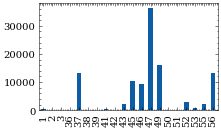

In [23]:
w_in=8
w=w_in/2.5
ec_CTS.iloc[0:20,0].plot(kind='bar', figsize=(w,(w/1.618)))

In [5]:
ec_industry = spatial.disagg_CTS_industry(sector='industry', source='power', use_nuts3code=True)
ec_industry.head()

,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
WZ,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,40775.665514,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.000000,0.0,0.000000,64028.621347,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,799.468351,0.0,884.541758,5589.280455,252.606841,277.299339,1739.770532,1303.873588,310.712952,...,1004.861678,170.607931,1111.383146,560.19884,2036.655707,4170.059958,116.866387,2114.613266,295.400193,3738.518695
9,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,6160.882210,0.000000,0.000000,436.426769,1702.012462


Plot your result using functions from the plot module:

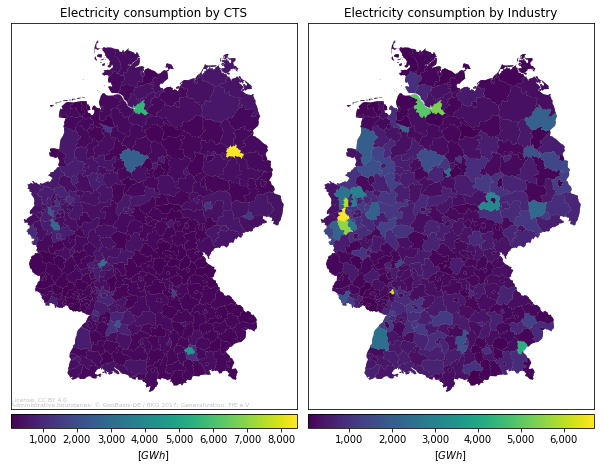

In [6]:
ec_combined = pd.concat([ec_CTS.sum()/1000, ec_industry.sum()/1000], keys=['CTS', 'Industry'], axis=1, join='inner')
fig, ax = plot.choropleth_map(ec_combined, relative=False, unit='GWh', axtitle='Electricity consumption by', 
                              colorbar_each_subplot=True,  add_percentages=False)

Let's continue with ``gas`` for both ``CTS`` and ``industry``:

### 2.2 Gas Consumption in [MWh/a]


In [3]:
gc_CTS = spatial.disagg_CTS_industry(sector='CTS', source='gas', use_nuts3code=True)
gc_CTS.head()

,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
WZ,,,,,,,,,,,,,,,,,,,,,
1,87.573336,390.711808,606.276944,1151.926194,9902.523420,4404.234567,8009.592073,5894.359179,13371.774823,4634.650417,...,7558.252570,4448.109715,3122.790783,5806.785842,1219.290299,4708.750933,8764.070048,9249.091603,6320.034734,4991.680173
2,0.000000,0.069842,0.076301,0.000000,0.026209,1.362178,0.011306,0.118691,0.095143,0.610412,...,0.027975,0.407139,0.386747,0.150352,1.773025,0.322162,0.034633,0.746059,0.280162,0.000000
3,0.000000,0.000000,0.161582,0.000000,0.390674,0.015608,0.689007,0.156270,0.053217,0.106548,...,0.000000,0.005475,0.014026,0.000000,0.000000,0.065905,0.022015,0.049722,0.000000,0.000000
36,0.000000,17.289317,0.000000,0.000000,0.000000,8.370139,3.574893,5.965509,10.721606,0.000000,...,8.845956,2.935934,7.521533,5.013432,41.180715,23.932307,2.677587,6.576253,16.060556,14.851708
37,51.732842,6.320802,0.000000,32.559983,8.940401,77.997911,33.812290,9.645752,46.143840,14.301104,...,14.303205,0.000000,12.161718,23.793834,11.384100,10.644610,5.906989,10.633276,0.000000,18.727394


In [4]:
gc_industry = spatial.disagg_CTS_industry(sector='industry', source='gas', use_nuts3code=True)
gc_industry.head()

,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
WZ,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1168.55946,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
6,0.0,0.000000,0.0,0.000000,319868.112447,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
7,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
8,0.0,506.715499,0.0,923.958266,3178.338699,245.312126,123.002679,1225.16812,1200.564287,137.824077,...,379.670555,86.046387,419.91795,211.661972,1358.739189,803.309318,78.47474,697.343615,199.548426,1412.538161
9,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,1403.927383,0.00000,0.000000,294.814550,643.077579


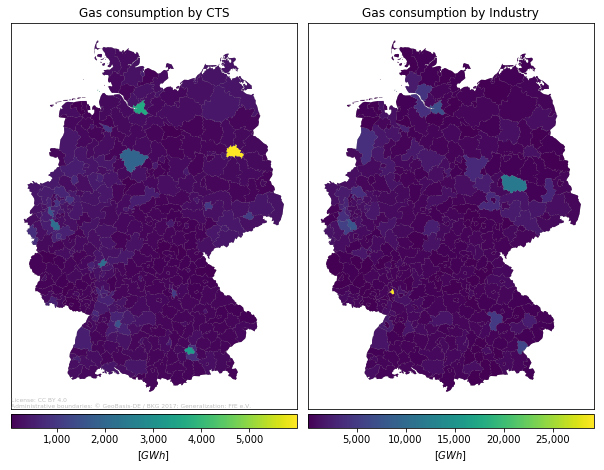

In [5]:
gc_combined = pd.concat([gc_CTS.sum()/1000, gc_industry.sum()/1000], keys=['CTS', 'Industry'], axis=1, join='inner')
fig, ax = plot.choropleth_map(gc_combined, relative=False, unit='GWh', axtitle='Gas consumption by', 
                              colorbar_each_subplot=True,  add_percentages=False)

Now save this figure e.g. as PDF file:

In [6]:
from disaggregator.config import data_out
fig.savefig(data_out('disagg_gas.pdf'), bbox_inches='tight')

### 2.3 Functions that work in the background

#### Function ``generate_specific_consumption_per_branch_and_district()``

The function `generate_specific_consumption_per_branch_and_district()` returns specific power and gas consumption per branch and district and requires at least two arguments:

1. ``iterations_power`` is the number of iterations for specific power consumption and must be a positiv integer (8 is recommended).  
2. ``iterations_gas`` is the number of iterations for specific gas consumption and must be a positiv integer (8 is recommended).


Additionally, you can choose to generate solely the specific electricity consumption obtained from the grid and the specific gas consumption without consumption for self-generation of electricity by setting ``no_self_gen=True``.

In [2]:
spec_ec_district, spec_gc_district = data.generate_specific_consumption_per_branch_and_district(8,8)

In [4]:
spec_ec_district.head()

,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
1,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,...,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806
2,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,...,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879
3,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,...,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125
5,167.180743,238.494784,138.232790,144.713079,1001.644188,155.656725,400.074771,252.001533,235.649094,400.074771,...,400.074771,299.714927,400.074771,400.074771,400.074771,898.696747,225.113494,458.380276,223.771238,400.074771
6,76.647782,109.343313,63.375940,66.346975,459.226368,71.364336,183.423302,115.535786,108.038642,183.423302,...,183.423302,137.411068,183.423302,183.423302,183.423302,412.027792,103.208358,210.154776,102.592971,183.423302


#### Function ``generate_specific_consumption_per_branch()``
This function is the basis for ``generate_specific_consumption_per_branch_and_district()`` and doesn't take any arguments. It returns multiple dataframes which you can see in the demonstation below.

The values are based on the publication [Umweltökonomische Gesamtrechnung, 2017](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Umwelt/Publikationen/Umweltnutzung-Wirtschaft/umweltnutzung-und-wirtschaft-energie-pdf-5850014.html) for 2015, which is also available from the DemandRegio database (table_id = 71, with some industry branches (WZ) being grouped together and with ET = 12 for gas and ET = 18 for electricity)

In [9]:
[df_spez_ec, df_spez_gc, df_abs_consumption, df_emp, 
 df_f_sv_no_self_gen, df_f_gv_no_self_gen] = data.generate_specific_consumption_per_branch()

In [13]:
## specific electricity consumption for every branch
df_spez_ec.head()

,spez. SV
1,21.431806
2,6.047879
3,47.561125
5,362.567391
6,194.389774


In [14]:
## absolute consumption as in "Umweltökonomischer Gesamtrechnung" for the year 2015, in Database dimension='spatial', table_id=71,
df_abs_consumption.head()

,value,WZ,ET
idx,,,
5,4.912033e+07,20,18
13,2.965345e+06,21,12
16,4.305735e+05,21,18
26,6.722733e+06,22,12
29,1.524831e+07,22,18


In [15]:
## employees by branch and district
df_emp.head()

ags,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
WZ,,,,,,,,,,,,,,,,,,,,,
1,13.0,58.000000,90.000000,171.0,1470.000000,653.795456,1189.00000,875.0,1985.000000,688.0,...,1122.000000,660.308590,463.568957,862.000000,181.000000,699.00000,1301.000000,1373.0,938.190264,741.0
2,0.0,8.238066,9.000000,0.0,3.091415,160.673202,1.33352,14.0,11.222433,72.0,...,3.299752,48.023294,45.618046,17.734525,209.133881,38.00000,4.085042,88.0,33.045953,0.0
3,0.0,0.000000,22.747843,0.0,55.000000,2.197390,97.00000,22.0,7.492031,15.0,...,0.000000,0.770763,1.974607,0.000000,0.000000,9.27825,3.099355,7.0,0.000000,0.0
5,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,101.920112,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0
6,0.0,0.000000,0.000000,0.0,139.427145,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0


In [17]:
# dataframes contain factors for calculating specific electricity consumption solely obtained from the grid
# and specific gas consumption without consumption for self-generation of electricity (this is needed when no_self_gen = True)
df_f_sv_no_self_gen.head()

1    1.000000
2    1.000000
3    1.000000
5    0.853051
6    0.803576
Name: Strom Netzbezug, dtype: float64

In [18]:
df_f_gv_no_self_gen.head()

1    1.000000
2    1.000000
3    1.000000
5    0.160950
6    0.955144
Name: f_GV_WZ_no_self_gen, dtype: float64

## 3. Temporal Functions

The temporal functions perform the task to calculate energy demand time series per district and branch. Therefore, the output from the `spatial` functions is needed. 

Furthermore, normalized load time series are generated for every branch and district. The CTS load time series for power and gas are standard load profiles, the industry time series represent typical working shifts in the respective branch, with a low load level for non-working hours and a high load level for working hours. 9 different load profiles have been defined for industry representing 1-, 2- and 3-shift operation on 5, 6 and 7 days per week. Important functions, that fulfill the tasks in the background are `shift_load_profile_generator()`, `CTS_power_slp_generator()` as well as `t_allo()`, `h_value()`, `gas_slp_weekday_params` and `disagg_daily_gas_slp`.

The results of these functions are brought together in 3 functions:
- `disagg_temporal_power_CTS()` for the results on CTS for power
- `disagg_temporal_gas_CTS()` for the results on CTS for gas
- `disagg_temporal_industry()` for the results on industry for gas and power

Each of these 3 function has a boolean argument `detailed` which is set on `False` by default. If `detailed` is put on `True` the function will return a multi-index-DataFrame() which contains a time series per branch AND district. If set on `False` it will only contain aggregated time series per district.

### 3.1 CTS electricity consumption [MWh/15min]
#### 3.1.1 Disaggregate using **standard load profiles**: Function ``disagg_temporal_power_CTS()``
- Disagreggate spatial data of CTS' **power** demand temporally in **MWh**
- returns DataFrame with districts as columns and timesteps as rows 
- takes two optional arguments:
    - if ``detailed = True``, returns DataFrame with multiindex in columns with ``level=0`` for districts and ``level=1`` for branches, timesteps as rows
    - if ``use_nuts3code=True``, uses NUTS-3 Codes instead of AGS
- Uses temporal and spatial functions `disagg_CTS('power')` , `CTS_power_slp_generator` and information from `config.py`

In [2]:
df_CTS = temporal.disagg_temporal_power_CTS(detailed=False, use_nuts3code=True)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [3]:
df_CTS.head()

,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
2015-01-01 00:00:00,3.115564,8.379840,6.026278,2.727286,3.642590,3.686675,5.439147,5.122272,6.617861,2.154296,...,1.834572,1.247310,2.339211,1.945665,1.869235,2.747839,2.046323,2.031765,2.400117,2.177006
2015-01-01 00:15:00,3.272524,8.954310,6.343744,2.895361,3.784762,3.837316,5.734542,5.401852,6.876733,2.259250,...,1.873499,1.275523,2.423719,1.999271,1.934031,2.857229,2.091217,2.073656,2.464980,2.240333
2015-01-01 00:30:00,3.185879,8.686477,6.161881,2.814476,3.678429,3.743681,5.513620,5.203116,6.684633,2.182117,...,1.829904,1.242645,2.365671,1.948543,1.907598,2.791247,2.037906,2.015934,2.411546,2.193227
2015-01-01 00:45:00,3.109915,8.458016,6.000229,2.743821,3.586475,3.662532,5.309586,5.017806,6.517762,2.113354,...,1.794044,1.214799,2.316215,1.905113,1.886801,2.735422,1.993336,1.967264,2.367216,2.154155
2015-01-01 01:00:00,3.053411,8.291141,5.875231,2.690501,3.515937,3.602490,5.136775,4.859782,6.390216,2.057655,...,1.768597,1.194038,2.280938,1.872580,1.875832,2.695362,1.960433,1.930250,2.336541,2.127334


In [6]:
# export your data using
df_CTS.to_csv(data_out('CTS_Power_2015_MWh.csv'))

(<Figure size 864x216 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F6B848BA8>]],
       dtype=object))

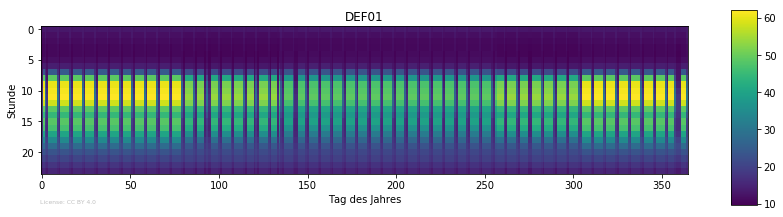

In [7]:
# or plot your data using
plot.heatmap_timeseries(df_CTS['DEF01'].resample('H').sum(), unit = 'MWh')

#### or use detailed version of the function

In [7]:
df_CTS_detail = temporal.disagg_temporal_power_CTS(detailed=True, use_nuts3code=True)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [8]:
# filter your results using multiindex
df_lk_DEF01 = df_CTS_detail.loc[:, 'DEF01']
df_lk_DEF01.head()

WZ,1,2,81,3,36,37,38,39,49,50,...,91,55,56,87,92,93,88,97,98,94
2015-01-01 00:00:00,0.005035,0.0,0.011680,0.0,0.0,0.279572,0.003571,0.0,0.343933,7.841506e-07,...,0.004717,0.038908,0.221993,0.084544,0.011768,0.027650,0.141953,0.004224,0.0,0.066772
2015-01-01 00:15:00,0.004757,0.0,0.011033,0.0,0.0,0.285756,0.003650,0.0,0.351541,8.014951e-07,...,0.005062,0.042482,0.242383,0.092309,0.012849,0.030189,0.169684,0.005050,0.0,0.098344
2015-01-01 00:30:00,0.004597,0.0,0.010662,0.0,0.0,0.287383,0.003671,0.0,0.353543,8.060594e-07,...,0.004885,0.039600,0.225939,0.086047,0.011977,0.028141,0.157273,0.004680,0.0,0.089323
2015-01-01 00:45:00,0.004478,0.0,0.010387,0.0,0.0,0.289661,0.003700,0.0,0.356345,8.124494e-07,...,0.004717,0.036660,0.209166,0.079659,0.011088,0.026052,0.145443,0.004328,0.0,0.081774
2015-01-01 01:00:00,0.004388,0.0,0.010177,0.0,0.0,0.293241,0.003746,0.0,0.360750,8.224909e-07,...,0.004565,0.033836,0.193051,0.073522,0.010234,0.024045,0.134002,0.003988,0.0,0.075891


In [9]:
# use DataFrame.reorder_levels to filter for CTS branches
df_wz_81 = df_CTS_detail.reorder_levels([1,0], axis=1).loc[:,81]
df_wz_81.head()

LK,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
2015-01-01 00:00:00,0.011680,0.048792,0.056588,0.006384,0.007781,0.012692,0.016063,0.018931,0.037863,0.010812,...,0.004207,0.007543,0.007303,0.010061,0.002015,0.009326,0.007311,0.006664,0.006658,0.006163
2015-01-01 00:15:00,0.011033,0.046093,0.053458,0.006031,0.007351,0.011990,0.015174,0.017884,0.035768,0.010213,...,0.003974,0.007126,0.006899,0.009505,0.001904,0.008810,0.006906,0.006295,0.006289,0.005822
2015-01-01 00:30:00,0.010662,0.044541,0.051657,0.005828,0.007103,0.011586,0.014663,0.017282,0.034564,0.009870,...,0.003840,0.006886,0.006667,0.009185,0.001840,0.008513,0.006674,0.006083,0.006077,0.005626
2015-01-01 00:45:00,0.010387,0.043393,0.050327,0.005678,0.006920,0.011288,0.014286,0.016837,0.033673,0.009615,...,0.003741,0.006709,0.006495,0.008948,0.001792,0.008294,0.006502,0.005926,0.005921,0.005481
2015-01-01 01:00:00,0.010177,0.042516,0.049309,0.005563,0.006781,0.011060,0.013997,0.016496,0.032993,0.009421,...,0.003666,0.006573,0.006364,0.008767,0.001756,0.008126,0.006370,0.005806,0.005801,0.005371


#### 3.1.2 Disaggregation of electricity consumption using **branch load profiles**: Function ``disagg_temporal_power_CTS_blp()``
- works similar as disaggregation with standard load profiles (SLP), however uses industry specific branch load profiles (BLP), which have been created using measured data
- covers 39 industries from CTS sector and 12 from industrial sector
- industries where no BLP is available will be disaggregated using SLP
- the function can be called using the same arguments as ``disagg_temporal_power_CTS()`` 

In [4]:
df_CTS_blp = temporal.disagg_temporal_power_CTS_blp(year=2017, use_nuts3code=True)


disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
2017-01-01 00:00:00,3.800213,10.482711,7.073365,2.998896,4.064003,4.247980,6.401625,5.864854,7.306001,2.476614,...,2.043913,1.364739,2.814136,2.224591,2.073852,3.097030,2.209300,2.310941,2.655907,2.443931
2017-01-01 00:15:00,3.831911,10.563830,7.135415,3.027080,4.080126,4.271770,6.462183,5.920724,7.339348,2.486122,...,2.036444,1.361525,2.828614,2.224506,2.099233,3.114340,2.202448,2.299270,2.663873,2.451080
2017-01-01 00:30:00,3.802691,10.502479,7.075830,3.002880,4.035507,4.233381,6.358255,5.833662,7.262339,2.453226,...,2.012524,1.345941,2.805092,2.196900,2.091344,3.091345,2.170955,2.269202,2.641631,2.429442
2017-01-01 00:45:00,3.773852,10.444069,7.018136,2.980183,3.997429,4.198337,6.258193,5.749872,7.193444,2.422938,...,1.992848,1.333039,2.783816,2.172548,2.086419,3.072330,2.144049,2.244283,2.623960,2.411229
2017-01-01 01:00:00,3.749071,10.396706,6.967936,2.961747,3.968435,4.169310,6.167122,5.673649,7.138117,2.396130,...,1.977709,1.323205,2.766815,2.152261,2.087257,3.059965,2.122587,2.224864,2.613096,2.397899


In [7]:
df_CTS_blp.head()

,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
2017-01-01 00:00:00,3.800213,10.482711,7.073365,2.998896,4.064003,4.247980,6.401625,5.864854,7.306001,2.476614,...,2.043913,1.364739,2.814136,2.224591,2.073852,3.097030,2.209300,2.310941,2.655907,2.443931
2017-01-01 00:15:00,3.831911,10.563830,7.135415,3.027080,4.080126,4.271770,6.462183,5.920724,7.339348,2.486122,...,2.036444,1.361525,2.828614,2.224506,2.099233,3.114340,2.202448,2.299270,2.663873,2.451080
2017-01-01 00:30:00,3.802691,10.502479,7.075830,3.002880,4.035507,4.233381,6.358255,5.833662,7.262339,2.453226,...,2.012524,1.345941,2.805092,2.196900,2.091344,3.091345,2.170955,2.269202,2.641631,2.429442
2017-01-01 00:45:00,3.773852,10.444069,7.018136,2.980183,3.997429,4.198337,6.258193,5.749872,7.193444,2.422938,...,1.992848,1.333039,2.783816,2.172548,2.086419,3.072330,2.144049,2.244283,2.623960,2.411229
2017-01-01 01:00:00,3.749071,10.396706,6.967936,2.961747,3.968435,4.169310,6.167122,5.673649,7.138117,2.396130,...,1.977709,1.323205,2.766815,2.152261,2.087257,3.059965,2.122587,2.224864,2.613096,2.397899


(<Figure size 864x216 with 2 Axes>,
 array([[<AxesSubplot:title={'center':'DEF01'}, xlabel='Tag des Jahres', ylabel='Stunde'>]],
       dtype=object))

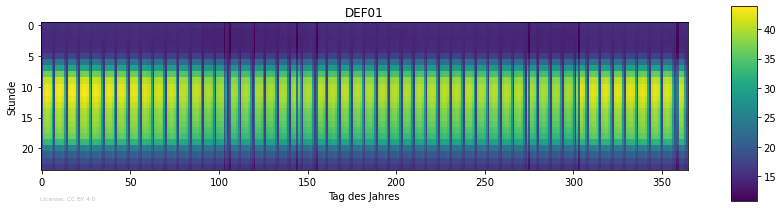

In [8]:
plot.heatmap_timeseries(df_CTS_blp['DEF01'].resample('H').sum(), unit = 'MWh')

In [ ]:
# function can also be called using detaild=True to provide an output per nuts3-region and industry via multicolumn
df_CTS_blp_detailed = temporal.disagg_temporal_power_CTS_blp(year=2016, detailed=True, use_nuts3code=True)


disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

### 3.2 CTS gas consumption [MWh/h]
#### Function disagg_temporal_gas_CTS()
- Disagreggate spatial data of CTS' **gas** demand temporally in **MWh**
- returns DataFrame with districts as columns and timesteps as rows 
- takes two optional arguments:
    - if ``detailed = True``, returns DataFrame with multiindex in columns with ``level=0`` for districts and ``level=1`` for branches, timesteps as rows
    - if ``use_nuts3code=True``, uses NUTS-3 Codes instead of AGS
- Uses temporal and spatial functions like `disagg_daily_gas_slp(state)` and information from `config.py` and `./data_in/Gas Load Profiles/`

In [ ]:
# run function
df_CTS_gas = temporal.disagg_temporal_gas_CTS(detailed=False, use_nuts3code=False)
df_CTS_gas.head()

In [11]:
# export your data using
df_CTS_gas.to_csv(data_out('CTS_Power_2015_MWh.csv'))

(<Figure size 864x216 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002208BB8E2E8>]],
       dtype=object))

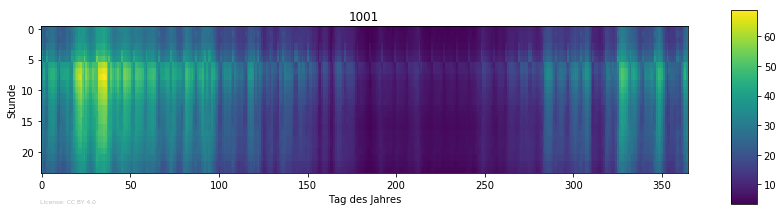

In [13]:
# or plot your data using
plot.heatmap_timeseries(df_CTS_gas['1001'], unit = 'MWh')

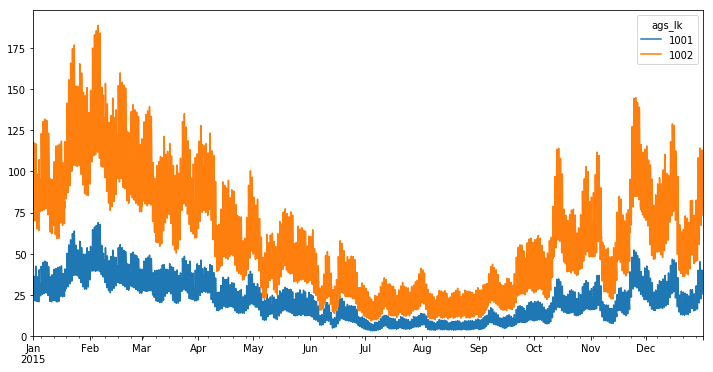

In [14]:
# plot your data
df_CTS_gas[["1001", "1002"]].plot(figsize=(12,6), ylim = 0)

### 3.3 Industry electricity consumption [MWh/15min]
#### 3.3.1 Disaggregation of electricity consumption using **shift load profiles**: Function ``disagg_temporal_industry()``
- Disagreggate spatial data of industry **power** and **gas** demand per quarter-hour for all districts in **MWh**
- returns DataFrame with districts as columns and timesteps as rows
- requires at least two arguments:
    - ``source`` which is the source of energy and must be one of ``['power','gas']``
    - ``low`` is the low load level for non-working hours and must be a float between ``[0,1]`` (default is 0.35, meaning that the lower level is 35% of the higher level)
- takes three optional arguments:
    - if ``no_self_gen = True`` then only electricity consumption obtained from the grid (for 'source' = 'power') and only gas consumption without gas consumption for self-generation of electricity (for 'source' = 'gas') will be disaggregated
    - if ``detailed = True``, returns DataFrame with multiindex in columns with ``level=0`` for districts and ``level=1`` for branches, timesteps as rows
    - if ``use_nuts3code=True``, uses NUTS-3 Codes instead of AGS
- Uses temporal and spatial functions like `shift_load_profile_generator()`, `disagg_CTS_industry()` and information from `config.py`


Let's start with industrial power consumption and compare consumption with and without self generation:

In [15]:
df_ec_industry_no_self_gen = temporal.disagg_temporal_industry(source='power', no_self_gen=True,
                                                               detailed=False, use_nuts3code=False)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [16]:
df_ec_industry_no_self_gen.head()

,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
2015-01-01 00:00:00,1.394185,3.056209,3.848114,2.356112,16.71226,2.195035,1.359229,1.87823,5.863123,1.160922,...,4.067236,3.640382,6.047988,2.895766,6.730523,12.689618,3.44743,8.795279,3.256991,3.279316
2015-01-01 00:15:00,1.394185,3.056209,3.848114,2.356112,16.71226,2.195035,1.359229,1.87823,5.863123,1.160922,...,4.067236,3.640382,6.047988,2.895766,6.730523,12.689618,3.44743,8.795279,3.256991,3.279316
2015-01-01 00:30:00,1.394185,3.056209,3.848114,2.356112,16.71226,2.195035,1.359229,1.87823,5.863123,1.160922,...,4.067236,3.640382,6.047988,2.895766,6.730523,12.689618,3.44743,8.795279,3.256991,3.279316
2015-01-01 00:45:00,1.394185,3.056209,3.848114,2.356112,16.71226,2.195035,1.359229,1.87823,5.863123,1.160922,...,4.067236,3.640382,6.047988,2.895766,6.730523,12.689618,3.44743,8.795279,3.256991,3.279316
2015-01-01 01:00:00,1.394185,3.056209,3.848114,2.356112,16.71226,2.195035,1.359229,1.87823,5.863123,1.160922,...,4.067236,3.640382,6.047988,2.895766,6.730523,12.689618,3.44743,8.795279,3.256991,3.279316


In [17]:
df_ec_industry = temporal.disagg_temporal_industry(source='power', no_self_gen=False, detailed=False, 
                                                   use_nuts3code=False, low=0.35)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [5]:
df_ec_industry.head()

,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
2015-01-01 00:00:00,2.254356,3.42689,4.665552,2.846043,24.307786,2.701095,1.529129,2.173698,7.969697,1.277809,...,4.937541,4.339693,7.213222,3.513629,7.573363,17.332591,4.094384,10.792797,3.937732,3.86812
2015-01-01 00:15:00,2.254356,3.42689,4.665552,2.846043,24.307786,2.701095,1.529129,2.173698,7.969697,1.277809,...,4.937541,4.339693,7.213222,3.513629,7.573363,17.332591,4.094384,10.792797,3.937732,3.86812
2015-01-01 00:30:00,2.254356,3.42689,4.665552,2.846043,24.307786,2.701095,1.529129,2.173698,7.969697,1.277809,...,4.937541,4.339693,7.213222,3.513629,7.573363,17.332591,4.094384,10.792797,3.937732,3.86812
2015-01-01 00:45:00,2.254356,3.42689,4.665552,2.846043,24.307786,2.701095,1.529129,2.173698,7.969697,1.277809,...,4.937541,4.339693,7.213222,3.513629,7.573363,17.332591,4.094384,10.792797,3.937732,3.86812
2015-01-01 01:00:00,2.254356,3.42689,4.665552,2.846043,24.307786,2.701095,1.529129,2.173698,7.969697,1.277809,...,4.937541,4.339693,7.213222,3.513629,7.573363,17.332591,4.094384,10.792797,3.937732,3.86812


In [6]:
ec_industry_combined = pd.concat([df_ec_industry.sum(axis=1), df_ec_industry_no_self_gen.sum(axis=1)], 
                                 keys=['industry', 'industry without self-generation'], 
                                 axis=1, join='inner')
ec_industry_combined.head()

,industry,industry without self-generation
2015-01-01 00:00:00,5444.975448,4248.745249
2015-01-01 00:15:00,5444.975448,4248.745249
2015-01-01 00:30:00,5444.975448,4248.745249
2015-01-01 00:45:00,5444.975448,4248.745249
2015-01-01 01:00:00,5444.975448,4248.745249


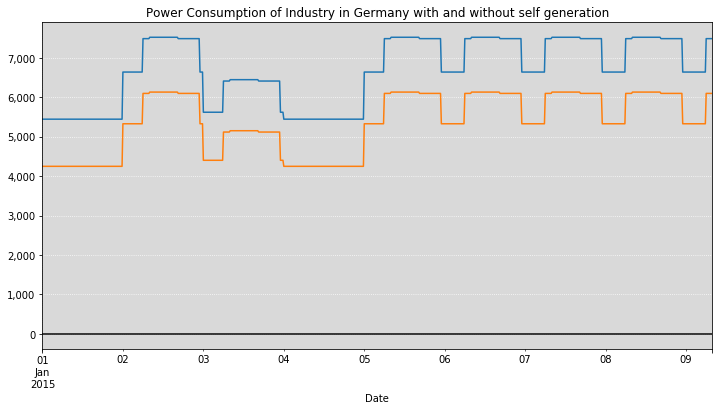

In [21]:
fig, ax = plt.subplots(figsize = [12,6])
ec_industry_combined['industry'].head(800).plot(ax=ax)
ec_industry_combined['industry without self-generation'].head(800).plot(ax=ax)
plot.set_ax_format(ax=ax, ylabel='[MWh]', xlabel='Date',
                   axtitle='Power Consumption of Industry in Germany with and without self generation')

#### 3.1.2 Disaggregation of electricity consumption using **branch load profiles**: Function ``disagg_temporal_power_industry_blp()``
- works similar as disaggregation with shift load profiles, however uses industry specific branch load profiles (BLP), which have been created using measured data
- can only be applied to the electricity consumtion, so ``source = 'power'`` has to be set 
- covers 39 industries from CTS sector and 12 from industrial sector
- industries where no BLP is available will be disaggregated using SLP
- the function can be called using the same arguments as ``disagg_temporal_power_CTS()``

In [2]:
df_industry_blp_detailed = temporal.disagg_temporal_industry_blp(year=2016, detailed=True, use_nuts3code=True)


disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [3]:
df_industry_blp_detailed.head()

LK,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
WZ,5,5,5,5,5,5,5,5,5,5,...,32,32,32,32,32,32,32,32,32,32
2016-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009544,0.005872,0.037014,0.001975,0.028776,0.067234,0.016498,0.012918,0.038857,0.018617
2016-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009555,0.005870,0.037029,0.001978,0.028821,0.067234,0.016530,0.012943,0.038918,0.018639
2016-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009408,0.005769,0.036423,0.001949,0.028390,0.066114,0.016291,0.012753,0.038338,0.018353
2016-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009257,0.005665,0.035818,0.001919,0.027948,0.064994,0.016052,0.012563,0.037758,0.018067
2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009099,0.005562,0.035227,0.001889,0.027494,0.063821,0.015793,0.012353,0.037147,0.017781


### 3.2 Industry gas consumption
- uses the same function ``disagg_temporal_industry()`` but with argument ``source='gas'``
- works similar as temporal disaggregation for electricity
- uses **shift load profiles**, branch load profiles are not available for gas consumption
- example shows disaggregation with argument ``low=0.2``

In [30]:
df_gas_industry_no_self_gen = temporal.disagg_temporal_industry(source='gas', no_self_gen=True, 
                                                                detailed=False, use_nuts3code=False, low=0.2)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [31]:
df_gas_industry_no_self_gen.head()

,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
2015-01-01 00:00:00,4.043184,2.629271,3.811686,2.94521,46.407238,1.417371,1.259123,2.723307,15.411155,1.088325,...,2.356463,2.700519,6.249007,1.60296,15.248808,9.994858,4.610591,5.489474,3.728261,1.846144
2015-01-01 00:15:00,4.043184,2.629271,3.811686,2.94521,46.407238,1.417371,1.259123,2.723307,15.411155,1.088325,...,2.356463,2.700519,6.249007,1.60296,15.248808,9.994858,4.610591,5.489474,3.728261,1.846144
2015-01-01 00:30:00,4.043184,2.629271,3.811686,2.94521,46.407238,1.417371,1.259123,2.723307,15.411155,1.088325,...,2.356463,2.700519,6.249007,1.60296,15.248808,9.994858,4.610591,5.489474,3.728261,1.846144
2015-01-01 00:45:00,4.043184,2.629271,3.811686,2.94521,46.407238,1.417371,1.259123,2.723307,15.411155,1.088325,...,2.356463,2.700519,6.249007,1.60296,15.248808,9.994858,4.610591,5.489474,3.728261,1.846144
2015-01-01 01:00:00,4.043184,2.629271,3.811686,2.94521,46.407238,1.417371,1.259123,2.723307,15.411155,1.088325,...,2.356463,2.700519,6.249007,1.60296,15.248808,9.994858,4.610591,5.489474,3.728261,1.846144


In [32]:
df_gas_industry = temporal.disagg_temporal_industry(source='gas', detailed=False, use_nuts3code=False, low=0.2)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [33]:
df_gas_industry.head()

,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
2015-01-01 00:00:00,4.977301,2.801578,4.417031,3.456985,54.395224,1.581741,1.387479,3.062978,18.531616,1.160091,...,2.835136,3.126634,7.018164,1.808697,16.640491,11.634421,5.344466,6.47785,4.175993,2.125346
2015-01-01 00:15:00,4.977301,2.801578,4.417031,3.456985,54.395224,1.581741,1.387479,3.062978,18.531616,1.160091,...,2.835136,3.126634,7.018164,1.808697,16.640491,11.634421,5.344466,6.47785,4.175993,2.125346
2015-01-01 00:30:00,4.977301,2.801578,4.417031,3.456985,54.395224,1.581741,1.387479,3.062978,18.531616,1.160091,...,2.835136,3.126634,7.018164,1.808697,16.640491,11.634421,5.344466,6.47785,4.175993,2.125346
2015-01-01 00:45:00,4.977301,2.801578,4.417031,3.456985,54.395224,1.581741,1.387479,3.062978,18.531616,1.160091,...,2.835136,3.126634,7.018164,1.808697,16.640491,11.634421,5.344466,6.47785,4.175993,2.125346
2015-01-01 01:00:00,4.977301,2.801578,4.417031,3.456985,54.395224,1.581741,1.387479,3.062978,18.531616,1.160091,...,2.835136,3.126634,7.018164,1.808697,16.640491,11.634421,5.344466,6.47785,4.175993,2.125346


In [34]:
gc_industry_combined = pd.concat([df_gas_industry.sum(axis=1), df_gas_industry_no_self_gen.sum(axis=1)], 
                                 keys=['industry', 'industry without self-generation'], 
                                 axis=1, join='inner')
gc_industry_combined.head()

,industry,industry without self-generation
2015-01-01 00:00:00,7313.367798,6220.145895
2015-01-01 00:15:00,7313.367798,6220.145895
2015-01-01 00:30:00,7313.367798,6220.145895
2015-01-01 00:45:00,7313.367798,6220.145895
2015-01-01 01:00:00,7313.367798,6220.145895


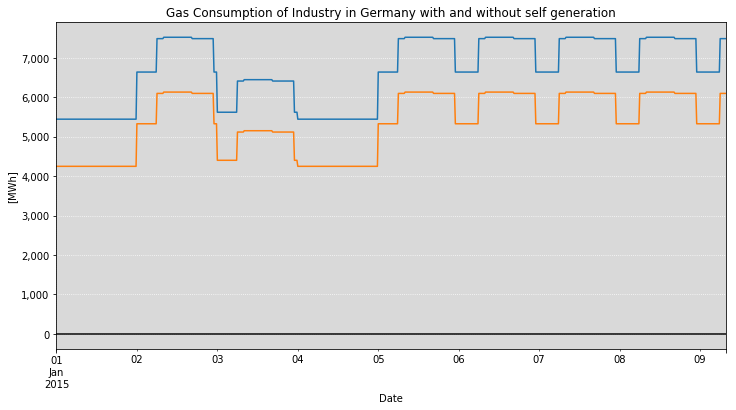

In [35]:
fig, ax = plt.subplots(figsize = [12,6])
ec_industry_combined['industry'].head(800).plot(ax=ax)
ec_industry_combined['industry without self-generation'].head(800).plot(ax=ax)
plot.set_ax_format(ax=ax, ylabel='[MWh]', xlabel='Date',
                   axtitle='Gas Consumption of Industry in Germany with and without self generation')

In [48]:
# export your data using
# df_gas_industry.to_csv(data_out('Industry_Gas_2015_MWh.csv'))

(<Figure size 864x216 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001954B4FDFD0>]],
       dtype=object))

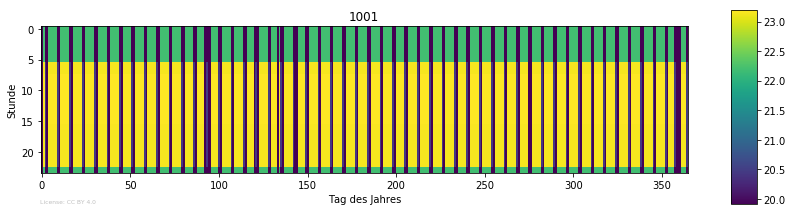

In [36]:
plot.heatmap_timeseries(df_gas_industry[1001].resample('H').sum(), unit = 'MWh')

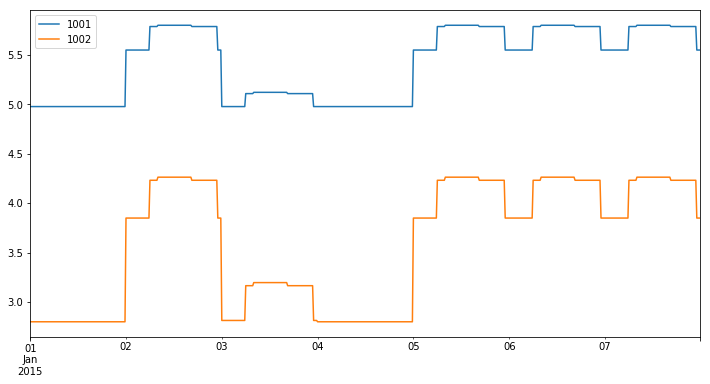

In [37]:
df_gas_industry.loc[:,[1001, 1002]].head(672).plot(figsize=(12,6))